In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
for i in df.columns:
  print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
dir_name=df['director'].apply(lambda x: str(x).split(",") ).tolist()
dir_name

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', ' José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', ' Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', ' Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', ' Abhishek Chaubey', ' Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara

In [ ]:
df_dir=pd.DataFrame(dir_name,index=df['title'])
df_dir

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,nan,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
directors_df = pd.DataFrame(dir_name, index=df['title']).stack().reset_index().drop('level_1',axis=1)
directors_df.rename({0: 'directors'}, axis=1, inplace=True)
directors_df.head(15)


,title,directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [ ]:
cast=df['cast'].apply(lambda x: str(x).split(',')).tolist()
df_cast=pd.DataFrame(cast,index=df['title']).stack().reset_index().drop('level_1',axis=1).rename(columns={0:'cast'})
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
country=df['country'].apply(lambda x:str(x).split(',')).tolist()
df_country=pd.DataFrame(country,index=df['title']).stack().reset_index().drop('level_1',axis=1).rename(columns={0:'country'})
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


In [ ]:
listed_in=df['listed_in'].apply(lambda x: str(x).split(',')).to_list()
df_listed=pd.DataFrame(listed_in,index=df['title']).stack().reset_index().drop('level_1',axis=1)
df_listed.rename({0:'list_in'},axis=1,inplace=True)
df_listed

,title,list_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [ ]:
dropped_df=df.drop(['director','cast','country','listed_in'],axis=1)
dropped_df

,show_id,type,title,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019",2007,R,158 min,"A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Dragged from civilian life, a former superhero..."


In [ ]:
# Step 1: Start with the base DataFrame
df_final = dropped_df.copy()

# Step 2: Merge with directors_df
df_final = df_final.merge(directors_df, on='title', how='left')

# Step 3: Merge with df_cast
df_final = df_final.merge(df_cast, on='title', how='left')

# Step 4: Merge with df_country
df_final = df_final.merge(df_country, on='title', how='left')

# Step 5: Merge with df_listed
df_final = df_final.merge(df_listed, on='title', how='left')


In [ ]:
df_final.shape

(202065, 12)

In [ ]:
null_percent = (df_final.isnull().sum() / len(df_final)) * 100
null_percent

,0
show_id,0.000000
type,0.000000
title,0.000000
date_added,0.078193
release_year,0.000000
rating,0.033158
duration,0.001485
description,0.000000
directors,0.000000
cast,0.000000


Since the null values are not treated, these might not be the accurate values.


In [ ]:
df_final[df_final.duplicated()]

,show_id,type,title,date_added,release_year,rating,duration,description,directors,cast,country,list_in
39354,s1632,Movie,Rust Creek,"November 30, 2020",2018,R,108 min,A wrong turn in the woods becomes a fight for ...,Jen McGowan,Micah Hauptman,United States,Thrillers
135656,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Maciej Dejczer,Adrianna Biedrzyńska,Denmark,Dramas
135657,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Maciej Dejczer,Adrianna Biedrzyńska,Denmark,International Movies
135658,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Maciej Dejczer,Adrianna Biedrzyńska,France,Dramas
135659,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Maciej Dejczer,Adrianna Biedrzyńska,France,International Movies
135660,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Maciej Dejczer,Adrianna Biedrzyńska,Poland,Dramas
135661,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Maciej Dejczer,Adrianna Biedrzyńska,Poland,International Movies


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   date_added    201907 non-null  object
 4   release_year  202065 non-null  int64 
 5   rating        201998 non-null  object
 6   duration      202062 non-null  object
 7   description   202065 non-null  object
 8   directors     202065 non-null  object
 9   cast          202065 non-null  object
 10  country       202065 non-null  object
 11  list_in       202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [ ]:
df_final.isnull().sum()

,0
show_id,0
type,0
title,0
date_added,158
release_year,0
rating,67
duration,3
description,0
directors,0
cast,0


**Univariate and Bi-Variate Analysis:**

In [ ]:
df_final.nunique()

,0
show_id,8807
type,2
title,8807
date_added,1767
release_year,74
rating,17
duration,220
description,8775
directors,5121
cast,39297


Since the number of unique values in the type and rating columns is relatively small, they can be reviewed manually. Based on this review, appropriate preprocessing can be applied—such as standardizing values or grouping similar categories—to ensure consistency and improve the quality of future analysis.

In [ ]:
df_final['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

"Since the duration column contains different units depending on the type—minutes for Movies and number of seasons for TV Shows—it is essential to separate this information into two distinct columns for clarity and accurate analysis."



In [ ]:
# Create the 'duration_min' column for Movies
df_final['duration_min'] = df_final.apply(
    lambda x: float(x['duration'].split()[0]) if isinstance(x['duration'], str) and x['type'] == 'Movie' else np.nan,
    axis=1
)

# Create the 'num_seasons' column for TV Shows
df_final['num_seasons'] = df_final.apply(
    lambda x: float(x['duration'].split()[0]) if isinstance(x['duration'], str) and
   x['type'] == 'TV Show' else np.nan,
    axis=1
)

# Optionally drop the original 'duration' column
df_final = df_final.drop('duration', axis=1)


In [ ]:
df_final['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

The rating column contains mostly valid TV/movie ratings, but also includes a few invalid values (e.g., durations) that need to be cleaned or removed. This may have happened due to data entry errors .

In [ ]:
df_final['rating'].value_counts()

,count
rating,
TV-MA,73915
TV-14,43957
R,25860
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779


since there are only 1 values of duration we can remove them.

In [ ]:

df_final = df_final.loc[~df_final['rating'].isin(['74 min', '84 min', '66 min'])]


In [ ]:
columns = ['type','country','list_in','rating']
for c in columns:
  print(c,":",df_final[c].nunique(),":",df_final[c].unique())

type : 2 : ['Movie' 'TV Show']
country : 198 : ['United States' 'South Africa' 'nan' 'India' ' Ghana' ' Burkina Faso'
 ' United Kingdom' ' Germany' ' Ethiopia' 'United Kingdom' 'Germany'
 ' Czech Republic' 'Mexico' 'Turkey' 'Australia' ' India' ' France'
 'Finland' 'China' ' Canada' ' United States' ' Japan' 'Nigeria' 'Japan'
 'Spain' 'France' 'Belgium' 'South Korea' ' Singapore' ' Australia'
 ' Mexico' ' Italy' ' Romania' 'Argentina' ' Venezuela' ' Hong Kong'
 'Russia' 'Canada' 'Hong Kong' ' China' 'Italy' '' ' South Korea'
 'Ireland' ' Nepal' 'New Zealand' ' Brazil' ' Greece' 'Jordan' 'Colombia'
 'Switzerland' 'Israel' 'Brazil' ' Spain' 'Taiwan' ' Nigeria' 'Bulgaria'
 ' Algeria' 'Poland' ' Israel' 'Saudi Arabia' 'Thailand' 'Indonesia'
 'Egypt' ' Denmark' ' Switzerland' 'Kuwait' ' Netherlands' ' Belgium'
 'Malaysia' ' New Zealand' 'Vietnam' ' Hungary' 'Sweden' 'Lebanon'
 'Romania' ' Syria' 'Philippines' 'Iceland' 'Denmark' ' Indonesia'
 ' United Arab Emirates' 'United Arab Emirates' '

**step-1:**Before handling missing values, we will first convert any string representations like 'nan', 'NaN', and 'None' in the directors and cast etc columns into actual NaN values using the replace() function. This will ensure .isnull() can correctly detect them. After that, missing values will be filled with 'Unknown Director' and 'Unknown Actor' etc respectively.

**step-2**:columns which have repetetive values, can be changed into categorical for better processing,filtering and grouping. Such columns are,
-> country,rating,list_in,directors.

In [ ]:
fake_nulls = ['None', 'none', 'NaN', 'nan', 'NAN', '', 'NULL', 'null', ' ']

# Replace them with np.nan across the entire DataFrame
df_final = df_final.replace(fake_nulls, np.nan)

# (Optional) Verify how many nulls you have now
print(df_final.isnull().sum())

show_id              0
type                 0
title                0
date_added         158
release_year         0
rating              67
description          0
directors        50643
cast              2149
country          12003
list_in              0
duration_min     56148
num_seasons     145914
dtype: int64


In [ ]:
columns = ['directors', 'cast', 'country', 'list_in', 'rating']



# Step 2: Fill missing values with appropriate labels
df_final['directors'] = df_final['directors'].fillna('Unknown Director')
df_final['cast'] = df_final['cast'].fillna('Unknown Actor')
df_final['country'] = df_final['country'].fillna('Unknown Country')
df_final['list_in'] = df_final['list_in'].fillna('Unlisted')
df_final['rating'] = df_final['rating'].fillna('Unrated')




In [ ]:
column=['rating','type','country','list_in']
for col in column:
    if df_final[col].dtype != 'category':
        df_final[col] = df_final[col].astype('category')

In [ ]:
df_final.isnull().sum()

,0
show_id,0
type,0
title,0
date_added,158
release_year,0
rating,0
description,0
directors,0
cast,0
country,0


**processing duration_min and and num_seasons-**

In [ ]:
movie_min=df_final[['title','duration_min']].drop_duplicates()
tv=df_final[['title','num_seasons']].drop_duplicates()


In [ ]:
print(movie_min['duration_min'].describe())
print(tv['num_seasons'].describe())


count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64
count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: num_seasons, dtype: float64


In [ ]:
print(movie_min['duration_min'].value_counts())
print(tv['num_seasons'].value_counts())


duration_min
90.0     152
97.0     146
94.0     146
93.0     146
91.0     144
        ... 
228.0      1
18.0       1
205.0      1
201.0      1
191.0      1
Name: count, Length: 205, dtype: int64
num_seasons
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
13.0       3
12.0       2
15.0       2
11.0       2
17.0       1
Name: count, dtype: int64


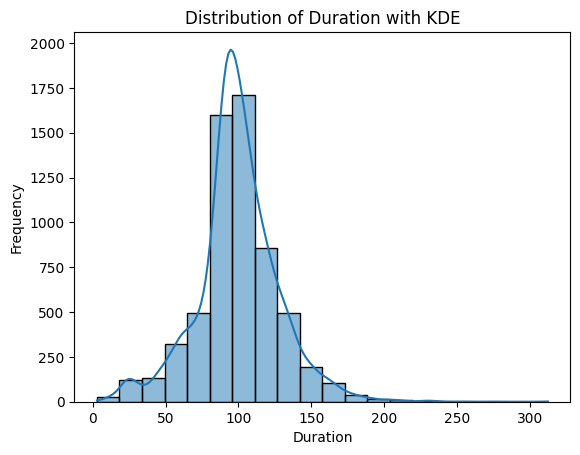

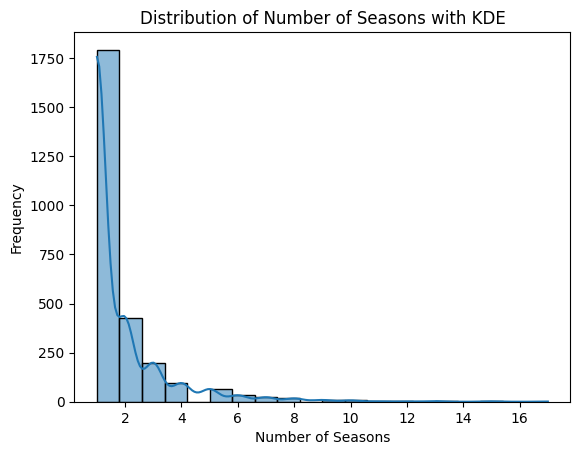

In [ ]:


# Plot for 'duration'
sns.histplot(data=movie_min, x='duration_min', kde=True, bins=20)
plt.title('Distribution of Duration with KDE')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

# Plot for 'num_of_season'
sns.histplot(data=tv, x='num_seasons', kde=True, bins=20)
plt.title('Distribution of Number of Seasons with KDE')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()


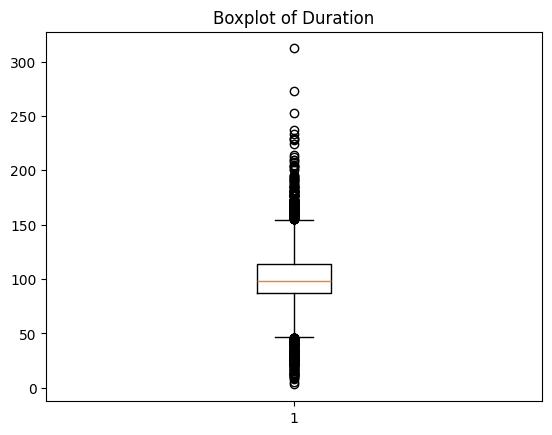

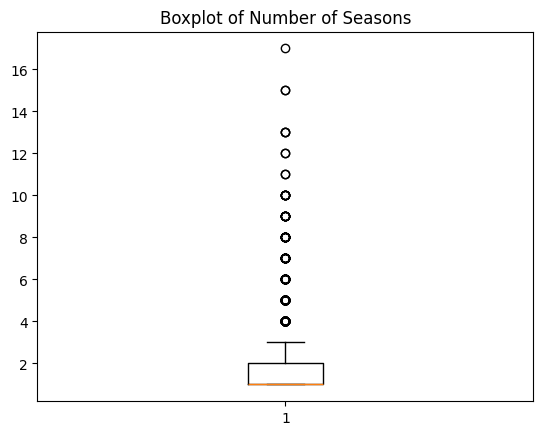

In [ ]:
plt.boxplot(movie_min['duration_min'].dropna())
plt.title("Boxplot of Duration")
plt.show()

plt.boxplot(tv['num_seasons'].dropna())
plt.title("Boxplot of Number of Seasons")
plt.show()


In [ ]:
# Fill nulls in 'duration' using median
df_final['duration_min'] = df_final['duration_min'].fillna(df_final['duration_min'].median())

# Fill nulls in 'num_of_season' using median
df_final['num_seasons'] = df_final['num_seasons'].fillna(df_final['num_seasons'].median())


**Handling Missing Values and Distribution Analysis**
Prior to analysis, missing values across the dataset were identified and addressed. Object-type columns often contained placeholder values such as 'None', 'NaN', or 'nan', which were standardized to np.nan to enable consistent null detection and handling.

Focus was then placed on two numerical columns: duration_mins and num_of_seasons, both of which contained missing values. To determine the appropriate imputation strategy, the distributions of these columns were visualized using kernel density estimate (KDE) plots.

duration_mins exhibited a slightly normal distribution but included several outliers.

num_of_seasons showed a heavily right-skewed distribution, with most entries clustered in the lower range and a few extreme values pulling the distribution.

Given the presence of outliers in both columns and to avoid distortion of central tendency, the median was selected as the imputation method for both duration_mins and num_of_seasons.

This approach ensured robust handling of missing data without being unduly influenced by extreme values, preserving the integrity of the dataset for further analysis.

In [ ]:
df_final['date_added'] = pd.to_datetime(df_final['date_added'].str.strip(), format="%B %d, %Y", errors='coerce')
df_final['Month'] = df_final['date_added'].dt.month
df_final['Year'] = df_final['date_added'].dt.year


In [ ]:
df_final.describe()

,date_added,release_year,duration_min,num_seasons,Month,Year
count,201904,202062.000000,202062.000000,202062.000000,201904.000000,201904.000000
mean,2019-06-19 13:32:00.247246336,2013.448941,106.051113,1.257896,6.636540,2018.965479
min,2008-01-01 00:00:00,1925.000000,3.000000,1.000000,1.000000,2008.000000
25%,2018-06-25 00:00:00,2012.000000,96.000000,1.000000,4.000000,2018.000000
50%,2019-09-01 00:00:00,2016.000000,104.000000,1.000000,7.000000,2019.000000
75%,2020-09-10 00:00:00,2019.000000,112.000000,1.000000,10.000000,2020.000000
max,2021-09-25 00:00:00,2021.000000,312.000000,17.000000,12.000000,2021.000000
std,NaN,9.013675,21.036027,1.041594,3.442224,1.551631


#Insightful Summary & Conclusion
**1) Date Added (Release Trend)**
Range: Content has been added from 2008 to 2021, covering 13+ years of data.

Median date (50% percentile): Around September 2019, meaning most titles were added post-2019.

Insight: A bulk of Netflix’s content expansion occurred between 2018 and 2021, indicating aggressive growth and content acquisition during this period.

**2) Duration (Movies only, in minutes)**
Mean duration: ~106 minutes, which is a typical feature film length.

Min/Max: Ranges from 3 mins (possibly short films or errors) to 312 mins (long documentaries or movies).

Insight: The majority of content falls within a 90–110 minutes duration window, aligning with standard movie formats. Content beyond 180 mins may need a quality check for accuracy or categorization.

**3- Number of Seasons (TV shows only)**
Mean: ~1.26 seasons per show, showing many TV shows are limited series or have just 1 season.

Max: 17 seasons, indicating that Netflix also carries long-running shows.

Insight: Most shows are short-form series, possibly due to binge-watching trends or Netflix’s experimental strategy with new series. Long-running shows are rare.

**4 Month-wise Addition**
Median Month: July (7) with data spread throughout the year.

Insight: There seems to be a slight spike in mid-year additions (June–July), likely aligning with summer holidays when user engagement is high.

**5 Year-wise Addition**
Mean year: ~2019, with a standard deviation of ~1.55, showing a tight concentration of releases between 2018 and 2021.

Insight: This confirms Netflix’s rapid expansion in recent years, likely to stay ahead in the streaming competition.

Processing un-necessary 'spaces' and for ease of writing and matching 'keywords' ,converting it to lowecase.

In [ ]:
df_final = df_final.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


/tmp/ipython-input-2702319086.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_final = df_final.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


**DATE_ADDED**

In [ ]:
date=df_final[['title','date_added']].drop_duplicates()
date['date_added'].value_counts().head(20)

,count
date_added,
2020-01-01,110
2019-11-01,91
2018-03-01,75
2019-12-31,74
2018-10-01,71
2019-10-01,62
2021-07-01,60
2018-11-01,60
2021-09-01,56


**Conclusion:**


*  The most frequent date is 2020-01-01 with 3748 titles added, followed by 2019-11-01, 2021-07-01, and 2017-10-01.

*  The top dates are clustered around the start of months, especially January, July, October, and November.
*  July appears twice in the top 20 (2021-07-01 and 2021-07-06), totaling ~3280 titles, making it a notably active month.


*  This pattern suggests bulk additions rather than consistent daily uploads.

This pattern suggests bulk additions rather than consistent daily uploads.

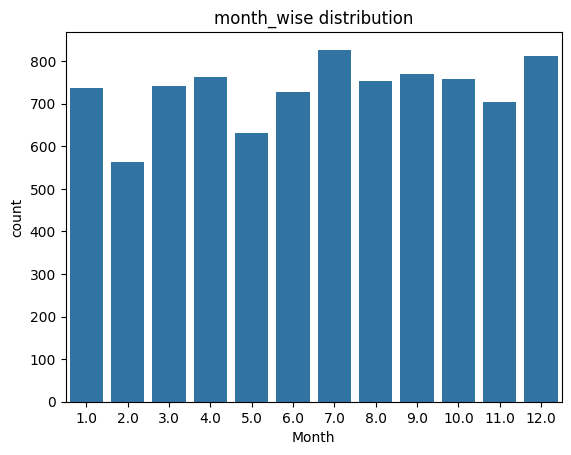

In [ ]:
Month_df=df_final[['title','Month']].drop_duplicates()
sns.countplot(x="Month", data=Month_df)
plt.title('month_wise distribution')
plt.show()

 The above pattern clearly highlights which months see the highest addition of
 content on the platform. July stands out as the peak month, likely due to vacation
 periods in many countries, driving higher user engagement. December follows
 closely, aligning with Christmas, New Year, and winter holidays — all prime times for
 increased streaming activity. This is further supported by the noticeable dip in
 content additions in the months surrounding these peaks. Overall, it suggests that
 Netflix strategically releases most of its content during major festivals and vacation
 seasons to capitalize on viewer availability and demand.

In [ ]:
Year_df=df_final[['type','Year','title']].drop_duplicates()
df_final['Year'].value_counts().head(10)

,count
Year,
2019.0,46997
2020.0,46051
2021.0,36534
2018.0,35785
2017.0,25208
2016.0,8567
2015.0,1560
2014.0,452
2011.0,438


segregation with respect to type of content:

 There is a noticeable surge in content additions between 2015 and 2020, with the peak occurring in 2019 and 2020. The subsequent drop in
 2021 may reflect the impact of the COVID-19 pandemic on production and content release schedules. The drop in content after peaking in
 2019 and 2020 can likely be attributed to the global disruptions caused by the COVID-19 pandemic .

**TYPE-**

In [ ]:
df_type = (
    df_final.groupby('type')
    .agg(count=('title', 'nunique'))
    .reset_index()
    .sort_values('count', ascending=False)
)
print(df_type)



      type  count
0    movie   6125
1  tv show   2675


/tmp/ipython-input-867472204.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final.groupby('type')


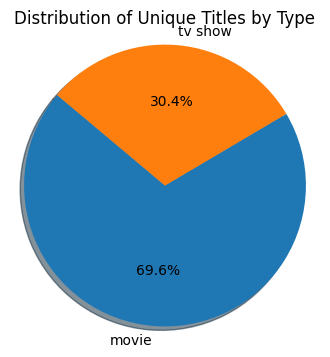

In [ ]:

plt.figure(figsize=(4,4))
plt.pie(
    df_type['count'],
    labels=df_type['type'],
    autopct='%1.1f%%',   # show percentages with 1 decimal
    startangle=140,     # rotate start angle for better look
    shadow=True
)
plt.title('Distribution of Unique Titles by Type')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()


In [ ]:
# Grouping by Year and Type, counting entries
year_type_counts = df_final.groupby(['Year', 'type']).size().reset_index(name='count')

# Pivoting to reshape the table
pivot_year = year_type_counts.pivot(index='Year', columns='type', values='count')

# Displaying the result
print(pivot_year)

type    movie  tv show
Year                  
2008.0     18        1
2009.0     30        0
2010.0     20        0
2011.0    438        0
2012.0     36        0
2013.0     75      132
2014.0    345      107
2015.0   1125      435
2016.0   4856     3711
2017.0  18251     6957
2018.0  28050     7735
2019.0  34473    12524
2020.0  32488    13563
2021.0  25709    10825


/tmp/ipython-input-183276593.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_type_counts = df_final.groupby(['Year', 'type']).size().reset_index(name='count')


**Conclusion:**
From 2015 to 2019, there was a sharp rise in both Movies and TV Shows on the platform, peaking in 2019. Post-2019, content additions declined, likely due to the pandemic’s impact in 2020–2021. However, TV Shows remained relatively more consistent than Movies during this period.

Suggestion:
Reinvesting in original TV Show content might offer better returns post-pandemic, as audience interest appears more stable.

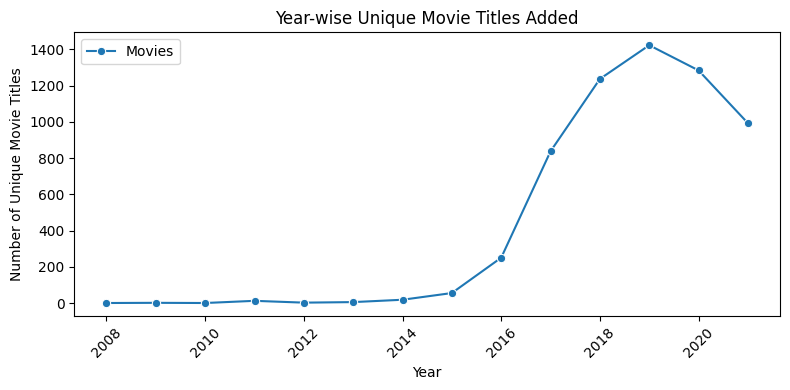

In [ ]:
movie_data = (
    df_final[df_final['type'].str.lower() == 'movie']
    .groupby('Year')
    .agg(count=('title', 'nunique'))
    .reset_index()
    .sort_values('Year')
)

plt.figure(figsize=(8, 4))
sns.lineplot(data=movie_data, x='Year', y='count', marker='o', label='Movies')
plt.title('Year-wise Unique Movie Titles Added')
plt.xlabel('Year')
plt.ylabel('Number of Unique Movie Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



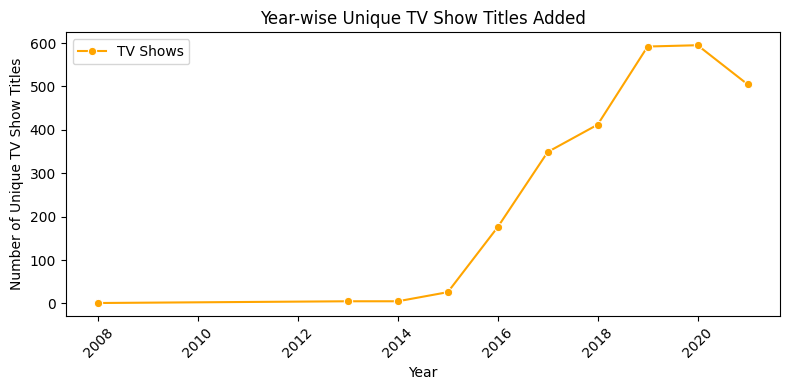

In [ ]:
tvshow_data = (
    df_final[df_final['type'].str.lower() == 'tv show']  # filter tv shows
    .groupby('Year')
    .agg(count=('title', 'nunique'))
    .reset_index()
    .sort_values('Year')
)

plt.figure(figsize=(8, 4))
sns.lineplot(data=tvshow_data, x='Year', y='count', marker='o', color='orange', label='TV Shows')
plt.title('Year-wise Unique TV Show Titles Added')
plt.xlabel('Year')
plt.ylabel('Number of Unique TV Show Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Conclusion and insights-**
*  Trend for both TV-shows and Movies, peaked during covid years, and came slightly at lower levels after that. Showing temporal effects are same on both the type of contents.

*  The platform has a movie-dominant content library, which suggests that Netflix may be focusing more on shorter, standalone content. This could be due to:

1.    Easier and quicker production cycles for movies compared to TV series.
2.   Wider appeal of movies for casual viewers and strategic targeting of audiences looking for quick entertainment .





**Country-**

In [ ]:
top_10_country = (
    df_final.groupby('country')
    .agg(Count=('title', 'nunique'))
    .reset_index()
    .sort_values('Count', ascending=False)
    .head(10)
)
top_10_country


,country,Count
115,united states,3686
45,india,1046
116,unknown country,838
114,united kingdom,806
20,canada,445
36,france,393
53,japan,317
102,spain,232
100,south korea,231
38,germany,226


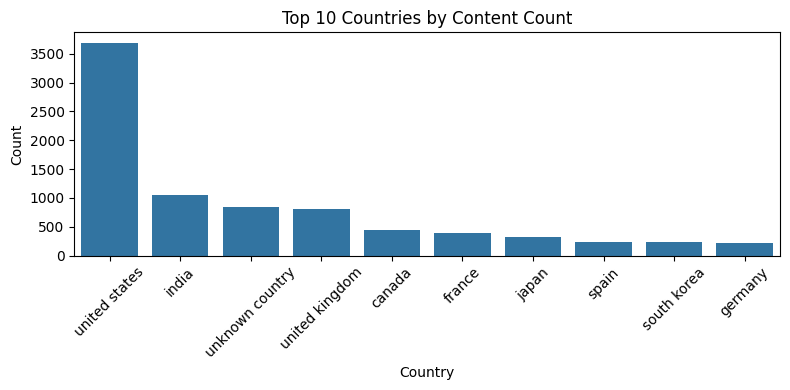

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top_10_country, x='country',y='Count')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
top_10_country_m = (
    df_final[df_final['type']=='movie'].groupby('country')
    .agg(Count=('title', 'nunique'))
    .reset_index()
    .sort_values('Count', ascending=False)
    .head(10)
)
top_10_country_m

,country,Count
110,united states,2749
41,india,962
109,united kingdom,534
111,unknown country,446
18,canada,319
32,france,303
34,germany,182
97,spain,171
49,japan,119
21,china,114


In [ ]:
top_10_country_tv = (
    df_final[df_final['type']=='tv show'].groupby('country')
    .agg(Count=('title', 'nunique'))
    .reset_index()
    .sort_values('Count', ascending=False)
    .head(10)
)
top_10_country_tv

,country,Count
62,united states,937
63,unknown country,392
61,united kingdom,272
29,japan,199
51,south korea,170
7,canada,126
18,france,90
24,india,84
56,taiwan,70
1,australia,66


 The plot indicates that content consumption is significantly higher in countries like the US, India, and the UK — highlighting them as key
 markets for Netflix. A deeper analysis into the specific genres, formats, and themes preferred by viewers in these regions can help Netflix
 tailor its content strategy to sustain and strengthen its presence. Simultaneously, studying countries with lower engagement can uncover
 barriers to entry or growth opportunities, enabling Netflix to expand its global footprint more effectively. For example- language preference in
 some countries can be a determining factor, for their content consumption, Netflix can add more content favorable to these countries' native
 languages.

# Insights & Recommendations Based on Content Demand by Country:


* 🇺🇸 United States & 🇮🇳 India – High Demand for Movies:
These countries show significantly higher interest in movie content.
* Netflix should continue to prioritize investments in movies for these markets.
**Recommendations:**


1.   Diversify movie genres to cater to varied audience tastes.
2. Include a mix of regional and global content to maximize reach and engagement.

1.   Invest in high-quality regional productions to strengthen local appeal.
2.  🇯🇵 Japan & 🇰🇷 South Korea – High Demand for TV Shows:
TV shows dominate content preference in these countries.

1.  Likely driven by cultural phenomena like Anime (Japan) and K-Drama (South Korea).


**Recommendations:**

*
Expand TV show library, especially in genres popular locally.
* Focus on local content creation and regional partnerships.

**Strategic Recommendations for Regional Growth:**
Content Localization:

*  Tailor content strategies based on regional preferences rather than a one-size-fits-all model.

*   This fosters deeper viewer loyalty and long-term market growth.
*  Addressing TV Show Competition in India:


1.   Platforms like Hotstar, JioCinema, and Zee5 dominate India's TV show market due to:
->Strong regional content libraries.

->Affordable subscription models.

2.
Netflix should:

Study consumer behavior and preferences from these platforms.
Explore partnerships or competitive offerings in the regional TV segment.




* Sub-channel Strategy:

Netflix can consider creating sub-channels within its platform (e.g., Netflix South, Netflix Anime, Netflix Bharat).

Helps organize content better and target user interests more directly.

**Rating-** It defines who the target audience is (Kids, Adults).
 It reflects content diversity and maturity levels.
 It hints at content strategy — e.g., are they pushing more mature dramas or family shows?
 "How are content ratings distributed across Movies and TV Shows on Netflix, and what does it reveal about their content targeting?"
 This question helps analyze whether Netflix produces more mature content for movies or youth/family-friendly content for TV shows — and
 reflects on their audience segmentation strategy.

/tmp/ipython-input-3834061443.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final.groupby('rating')


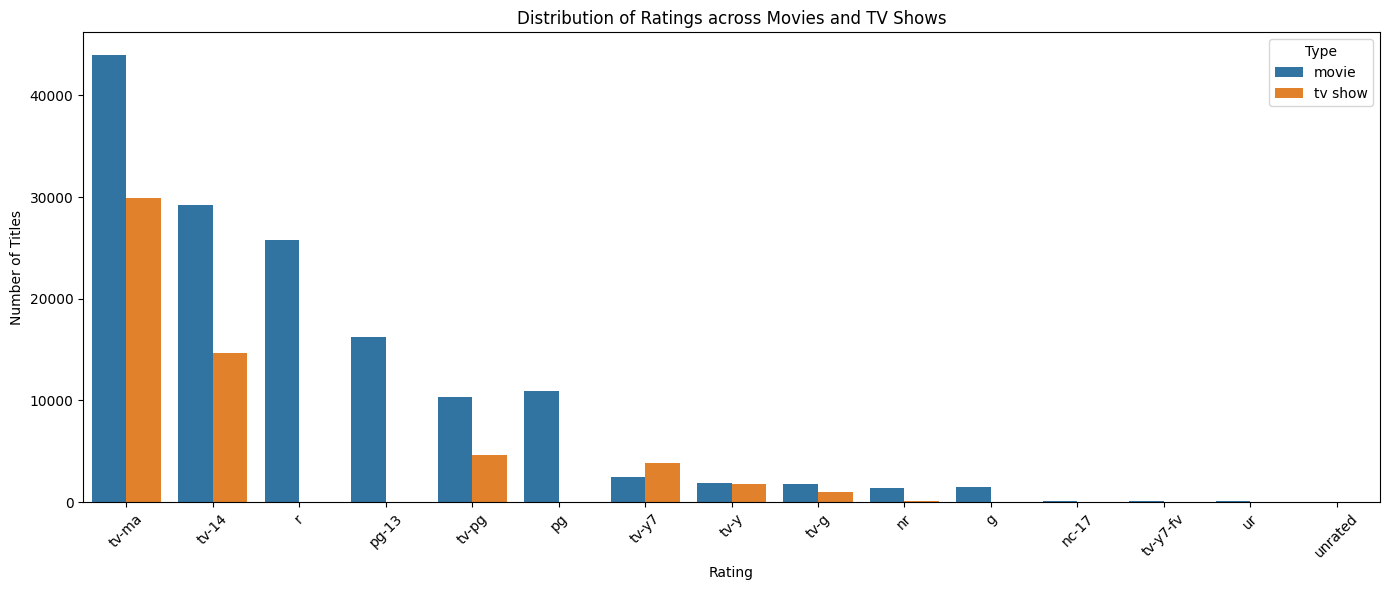

In [ ]:
data_rating = (
    df_final.groupby('rating')
    .agg(count=('title', 'nunique'))
    .reset_index()
    .sort_values('count', ascending=False)
)

plt.figure(figsize=(14, 6))
sns.countplot(data=df_final, x='rating', hue='type', order=df_final['rating'].value_counts().index)
plt.title('Distribution of Ratings across Movies and TV Shows')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

 The analysis reveals that Netflix offers a significant amount of mature content, with genres rated TV-MA,TV-14 and R dominating the platform. This
 could indicate a potential gap in the availability of content for younger audiences, particularly those looking for family-friendly or child
oriented programming. To better cater to a broader demographic, Netflix should focus on content diversification, ensuring a balanced mix of
 genres that include more family-friendly, children content, and PG-rated shows. By incorporating such content, Netflix can not only attract
 younger viewers but also expand its reach to family-oriented households, ensuring a more inclusive viewing experience across all age
 groups.

**Movie_duration**

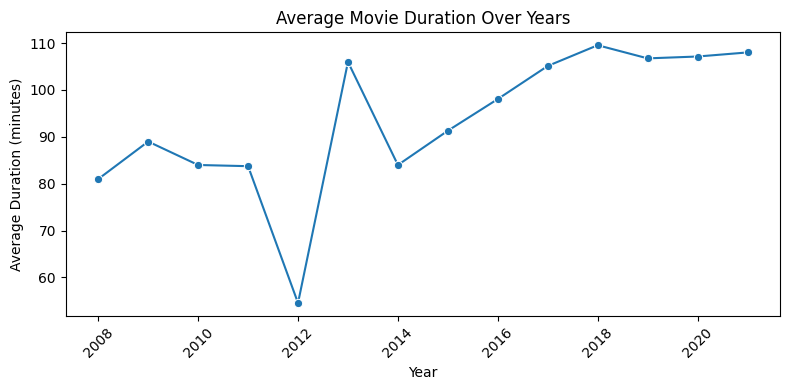

In [ ]:
# Example: average movie duration per year
avg_duration_per_year = (
    df_final[df_final['type'] == 'movie']
    .groupby('Year')
    .agg(avg_duration=('duration_min', 'mean'))
    .reset_index()
    .sort_values('Year')
)
plt.figure(figsize=(8,4))
sns.lineplot(data=avg_duration_per_year, x='Year', y='avg_duration', marker='o')
plt.title('Average Movie Duration Over Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Analysis:**

The average movie duration generally ranges between 80 to 110 minutes over the years.

There is a notable dip around 2012, where the average duration drops sharply to about 55 minutes.

After 2012, there is a rapid increase peaking around 2013, with duration jumping back above 100 minutes.

From 2014 onwards, the average movie duration steadily increases, stabilizing near 110 minutes by 2020–2021.

**Inference:**

The dip in 2012 might be due to a smaller or different sample of movies, or a trend toward shorter films that year.

The overall increasing trend suggests that movies have become longer on average in recent years, possibly reflecting audience preference for more detailed storytelling or evolving industry standards.

The relative stability after 2015 indicates a consistent average length typical for modern movies.

**TV_Show**

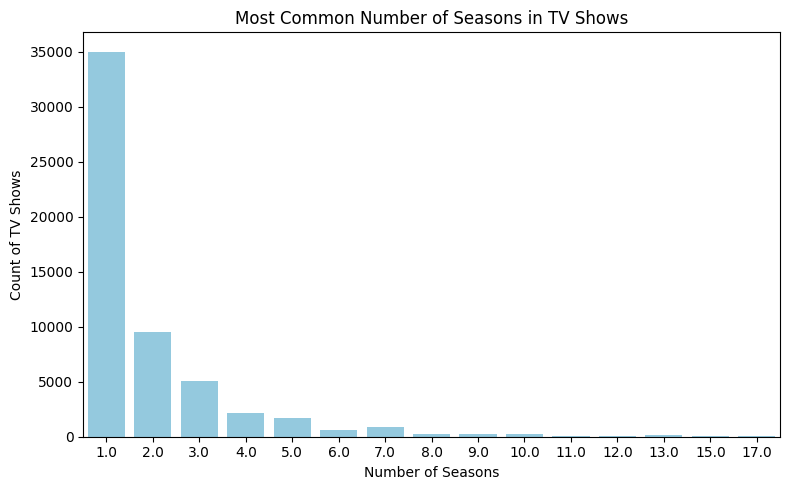

In [ ]:
# Filter only TV shows
tv_shows = df_final[df_final['type'] == 'tv show']

# Count frequency of number of seasons
season_counts = tv_shows['num_seasons'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=season_counts.index, y=season_counts.values, color="skyblue")
plt.title("Most Common Number of Seasons in TV Shows")
plt.xlabel("Number of Seasons")
plt.ylabel("Count of TV Shows")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The data clearly suggests that both content creators and viewers favor shows with fewer seasons. This aligns with the modern trend of fast-paced content consumption, creative experimentation through limited series, and the risk-averse approach of streaming platforms.

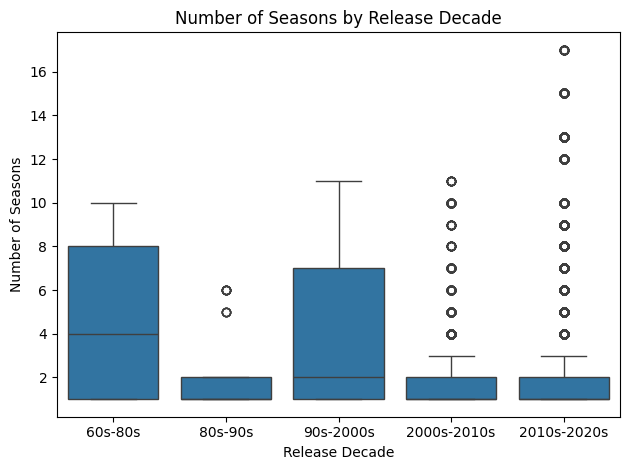

In [ ]:
tv_shows = df_final[df_final['type'] == 'tv show'].copy()
 # Define bins and labels compactly
bins = [1960, 1980, 1990, 2000, 2010, 2025]
labels = ['60s-80s', '80s-90s', '90s-2000s', '2000s-2010s', '2010s-2020s']
tv_shows['release_decade'] = pd.cut(tv_shows['release_year'], bins=bins, labels=labels)
 # Boxplot
sns.boxplot(data=tv_shows, x='release_decade', y='num_seasons')
plt.title('Number of Seasons by Release Decade')
plt.xlabel('Release Decade')
plt.ylabel('Number of Seasons')
plt.tight_layout()
plt.show()

**Analysis of Season Trends Over Decades The box plot reveals a clear shift in content strategy over time:**

*    1970s–1980s: Shows in these decades had longer average season counts, with a median of around 4 seasons and fewer outliers, indicating consistent, longer-running series.
*  1980s–1990s: The median dropped to 2 seasons, though still relatively stable, with occasional outliers reaching up to 6 seasons.

*   1990s–2000s: The trend of shorter shows continued (median ~2), but some popular series stretched to 10 seasons, appearing as outliers.
*   2000s–2010s: The box narrows significantly, indicating that most shows had only 1–2 seasons, but outliers increased, showing growing variation in content length.

*    2010s–2020s: This trend persists, with the majority of shows being short-form (1–2 seasons). However, notable outliers now reach up to 17
 seasons, reflecting continued viewer interest in long-running series.
  Inference and Recommendation This shift reflects a broader industry trend: platforms like Netflix are increasingly favoring crisp, concise
 storytelling that caters to the binge-watching culture of modern audiences. Shorter series align well with reduced attention spans and a
 desire for fast-paced, complete narratives.
 However, the presence of high-season outliers in recent years suggests that there remains a dedicated audience for deeper, long-form
 storytelling. These outliers may represent flagship series with strong fan bases, compelling narratives, or niche genre appeal.


















**Recommendation to Netflix:**
 Continue investing in shorter, high-impact series for mainstream consumption and binge-watching ease.
 Simultaneously, analyze the genres and viewer profiles associated with long-running outlier shows.
 Use these insights to develop or revive select long-form series that cater to dedicated viewer segments seeking immersive, evolving stories.
 This dual strategy will help balance mass appeal with audience depth, ensuring both engagement and loyalty across viewer types.

**Genre-**

In [ ]:
top_genre=df_final.groupby('list_in').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
top_genre

,list_in,count
0,international movies,2749
1,dramas,2425
2,comedies,1672
3,international tv shows,1350
4,documentaries,869
5,action & adventure,859
6,tv dramas,762
7,independent movies,756
8,children & family movies,641
9,romantic movies,616


In [ ]:

top_genre.columns = ['Genre', 'Count']


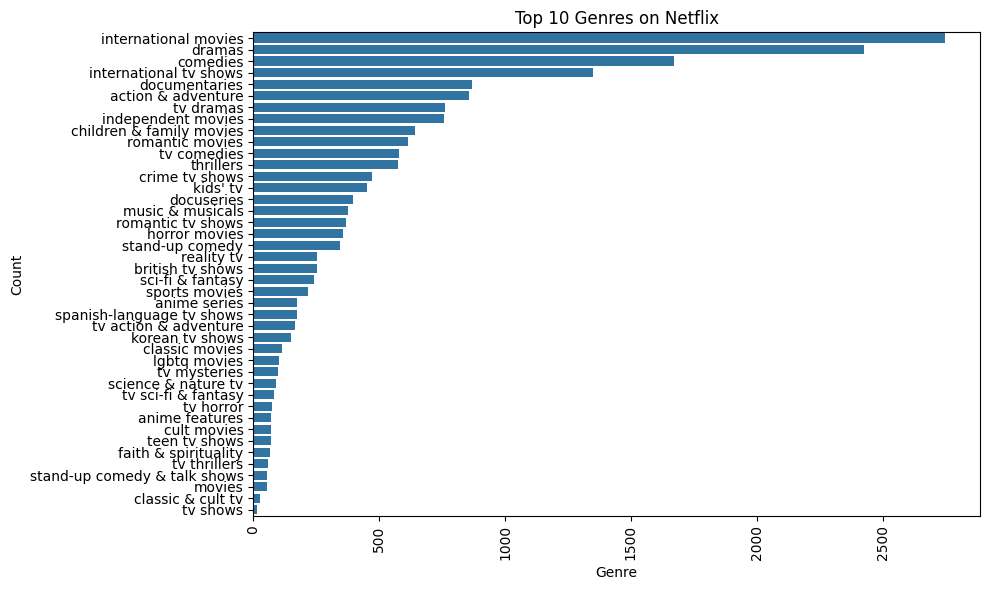

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genre, y='Genre', x='Count')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Here’s a crisp 5-line conclusion from your data:


*   International Movies (2,749) dominate the catalog, showing Netflix’s strong focus on cross-border cinema.

*   Dramas (2,425) and Comedies (1,672) are the next big categories, reflecting audience preference for story-driven and light-hearted content.

*  International TV Shows (1,350) lead among serial formats, proving the global pull of series content.
*  Niche but significant genres like Documentaries (869), Action & Adventure (859), and TV Dramas (762) still capture sizable audience segments.


*  Very small counts in Classic & Cult TV (28) and General TV Shows (16) suggest these are either underrepresented or less in demand on the platform.


In [ ]:
top_genres_movie = df_final[df_final['type']=='movie'].groupby('list_in').agg(count=('title','nunique')).reset_index().sort_values('count',ascending=False)
top_genres_movie.columns = ['Genre', 'Count']
top_genres_movie

,Genre,Count
11,international movies,2749
7,dramas,2425
4,comedies,1672
6,documentaries,869
0,action & adventure,859
10,independent movies,756
2,children & family movies,641
15,romantic movies,616
19,thrillers,576
14,music & musicals,375


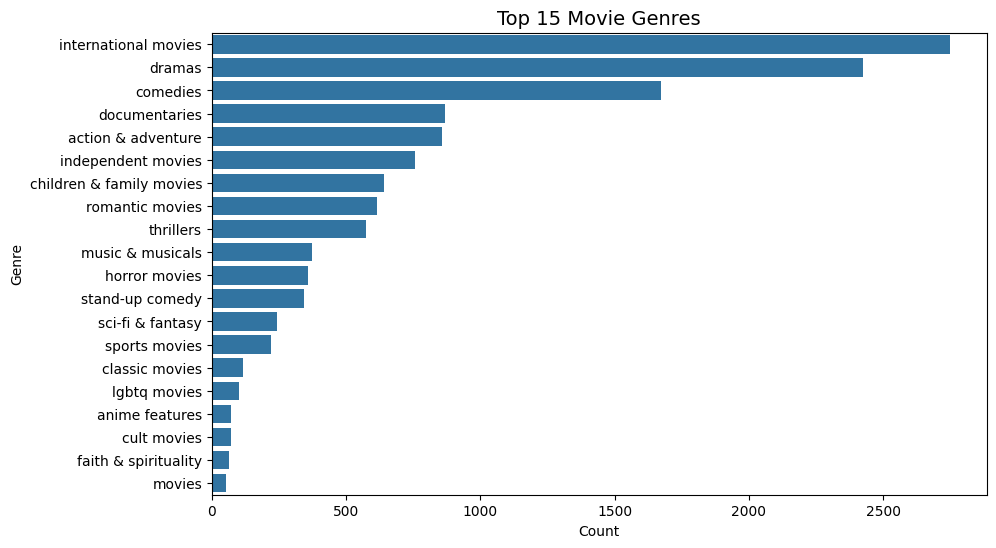

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres_movie, y='Genre', x='Count')
plt.title("Top 15 Movie Genres", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

**Summary & Insights**

*Top Genres*: Dramas around 2600, International Movies, and Comedies  dominate Netflix’s movie catalog.

*Mid-tier:* Action & Adventure, Independent, and Family Movies .

*Niche:* Horror, Sci-Fi/Fantasy, and Music/Musicals have moderate presence.

Rare: Classic and Cult Movies.

**Inference:** Netflix’s library is heavily skewed toward drama and global content, appealing to diverse international audiences.

**Recommendation:**

Diversify by adding more classic, cult, and niche films to attract specialized audiences.

Capitalize on popular genres (drama, comedy, action) with exclusive, high-quality releases to retain the mass market.

Conclusion: Netflix’s strength lies in variety and global reach, but boosting underrepresented genres could improve audience engagement and retention.

In [ ]:
top_genres_tv=df_final[df_final['type']=='tv show'].groupby('list_in').agg(count=('title','nunique')).reset_index().sort_values('count',ascending=False)
top_genres_tv

,list_in,count
5,international tv shows,1350
16,tv dramas,762
15,tv comedies,581
3,crime tv shows,470
6,kids' tv,451
4,docuseries,395
9,romantic tv shows,370
8,reality tv,255
1,british tv shows,253
0,anime series,176


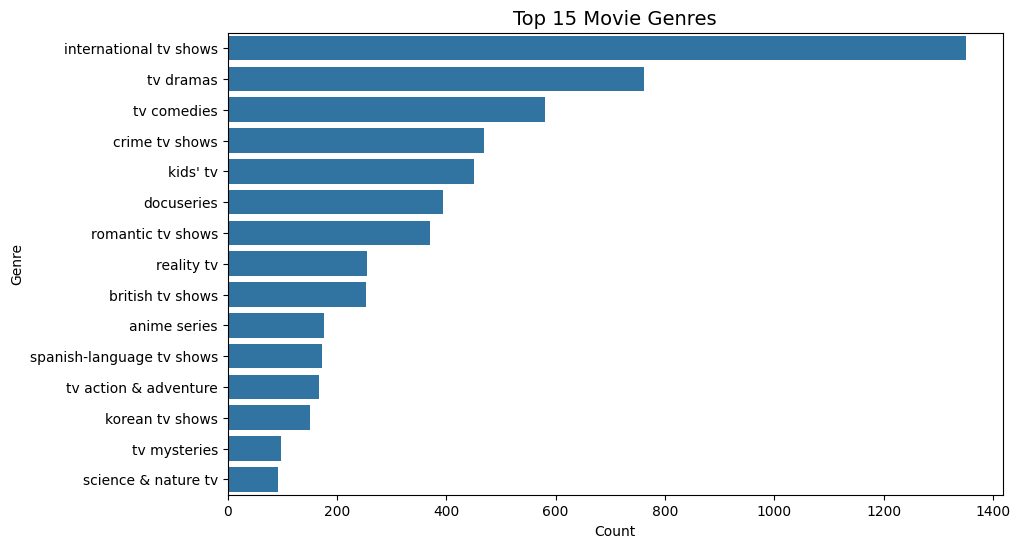

In [ ]:
top_genres_tv=df_final[df_final['type']=='tv show'].groupby('list_in').agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:15]
top_genres_tv.columns=['genre','count']
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres_tv, y='genre', x='count')
plt.title("Top 15 Movie Genres", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

**Summary & Insights**

*Top TV Categories:* International TV Shows around 1400, TV Dramas < 800 , and TV Comedies  dominate Netflix’s TV content.

*Mid-tier:* Crime, Kids’, Romantic, Anime, and Action/Adventure TV .

*Niche:* Spanish-Language, British, Mystery, Korean, and Sci-Fi/Fantasy TV shows have moderate representation.

*Rare:* TV Horror and Docuseries .

**Inference:** Netflix leans heavily on international and drama-driven series to cater to global audiences, with a healthy mix of kids’ and genre-specific programming.

**Recommendation:**

Expand niche categories like horror, docuseries, and sci-fi to attract genre enthusiasts.

Leverage international dominance by producing more localized originals in growing markets (e.g., Korean, Spanish, British).

Conclusion: Netflix’s TV library is globally diverse, but strengthening niche genres could enhance subscriber loyalty and attract untapped audience segments.

 Dramas, Comedies, and International TV Shows make up the majority of content on the platform, while Romantic movies appear to have the
 least representation. Given this underrepresentation, Netflix could explore the performance of existing romantic content—analyzing viewer
 engagement, ratings, and watch time—to identify which sub-genres or themes resonate best. Based on these insights, Netflix can consider
 expanding its romantic category with content tailored to audience preferences.

**CAST**

In [ ]:
most_popular_cast_movie = df_final[df_final['type']=='movie'].groupby('cast').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
most_popular_cast_movie.head(10)


,cast,count
0,unknown actor,475
1,anupam kher,42
2,shah rukh khan,35
3,naseeruddin shah,32
4,om puri,30
5,akshay kumar,30
6,paresh rawal,28
7,julie tejwani,28
8,amitabh bachchan,28
9,rupa bhimani,27


/tmp/ipython-input-2223030518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_popular_cast_movie.head(30), x='count', y='cast', palette='viridis')


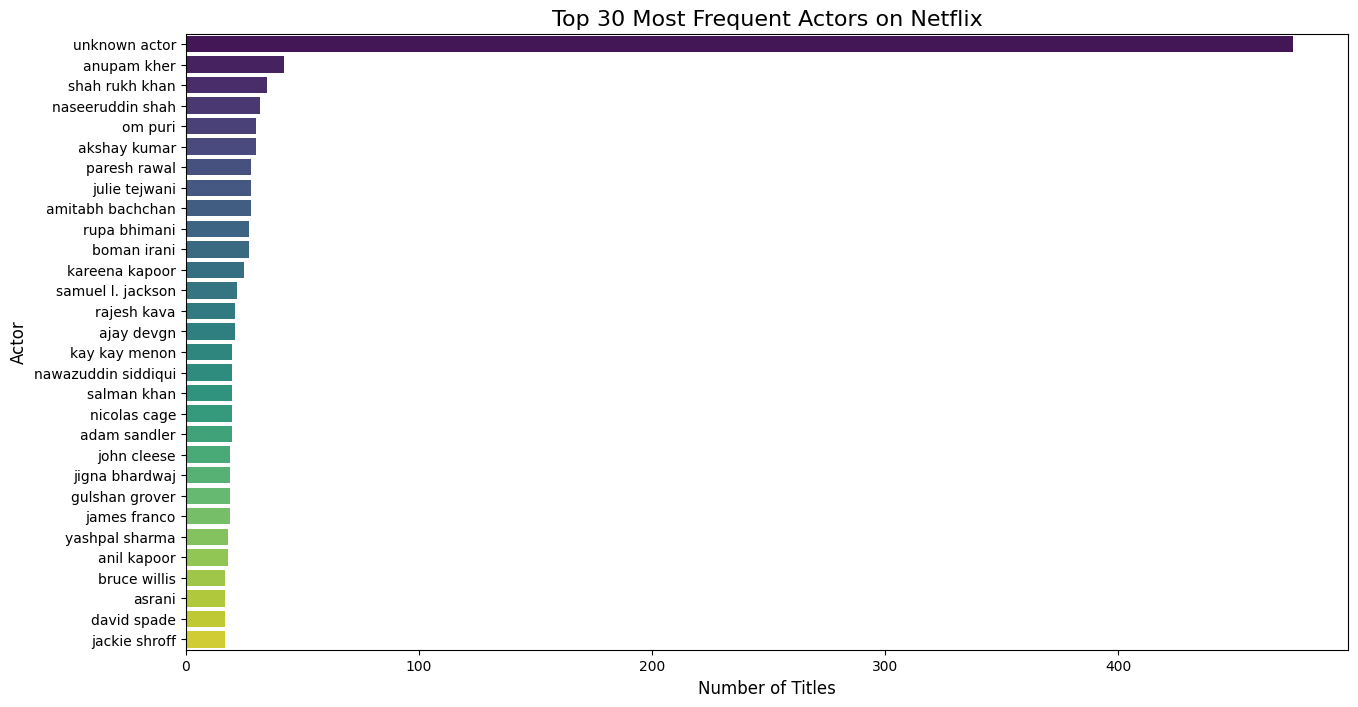

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=most_popular_cast_movie.head(30), x='count', y='cast', palette='viridis')
plt.title('Top 30 Most Frequent Actors on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.show()

Conclusion: Anupam Kher, Shah Rukh Khan, and Julie Tejwani are among the most featured actors on Netflix, with 43, 35, and 33 unique titles respectively. The distribution shows a steep drop-off, with most actors appearing in only one title.

Inference: A small group of actors dominates Netflix’s catalog, while the majority have minimal representation — indicating a mix of recurring star power and diverse, one-off appearances.

In [ ]:
most_popular_cast_tv = df_final[df_final['type']=='tv show'].groupby('cast').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
most_popular_cast_tv.head(10)


,cast,count
0,unknown actor,350
1,takahiro sakurai,25
2,yuki kaji,19
3,ai kayano,17
4,junichi suwabe,17
5,daisuke ono,17
6,yuichi nakamura,16
7,yoshimasa hosoya,15
8,jun fukuyama,15
9,david attenborough,14


/tmp/ipython-input-699488802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_popular_cast_tv.head(30), x='count', y='cast', palette='viridis')


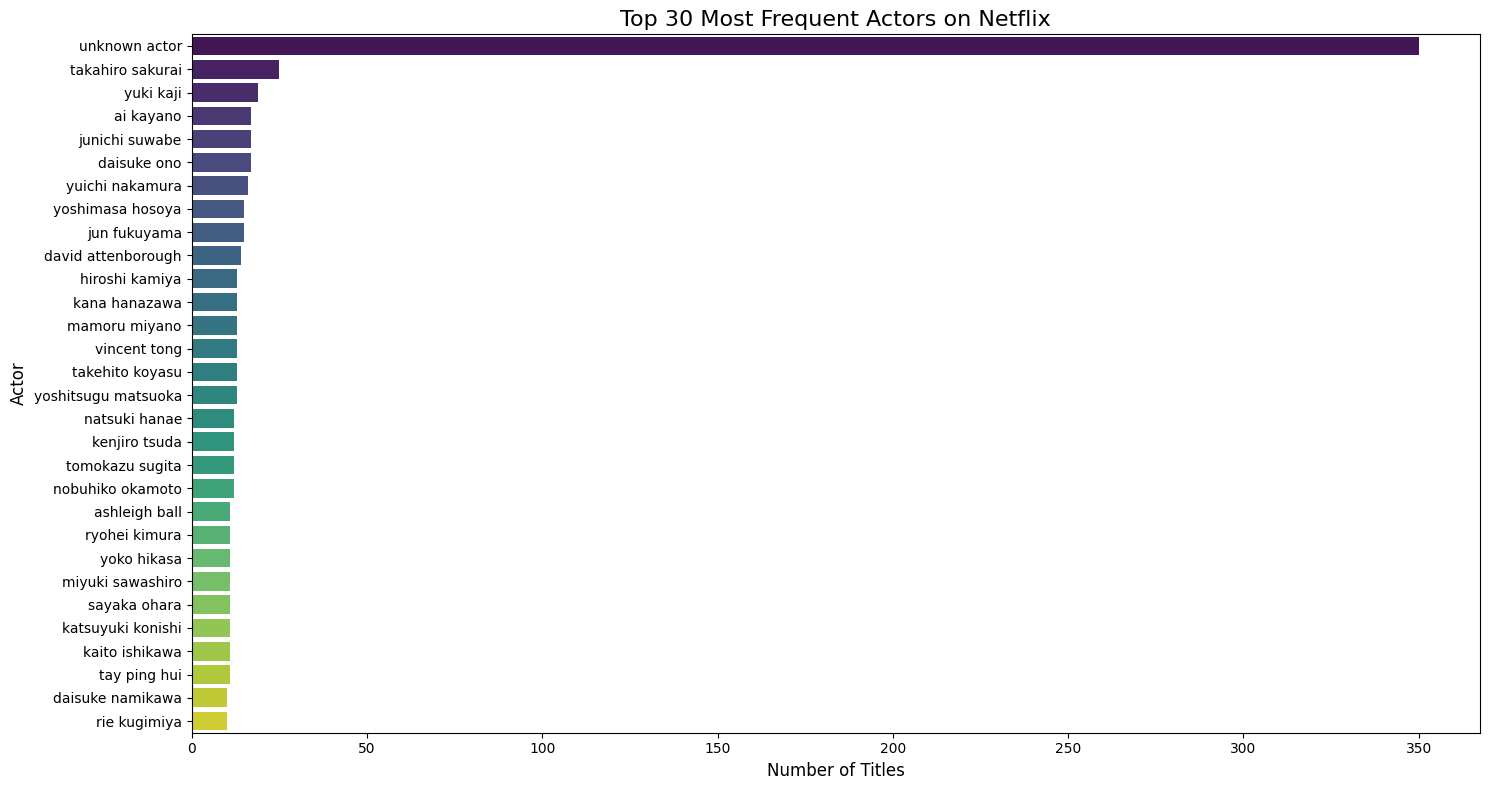

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=most_popular_cast_tv.head(30), x='count', y='cast', palette='viridis')
plt.title('Top 30 Most Frequent Actors on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.tight_layout()
plt.show()



Perfect 👍 Now the dataframe is clear:

Most frequent actor is listed as "unknown actor" (350 times) → this probably means the cast info was missing in many rows.

After that, the top real actors are mostly Japanese voice actors (Takahiro Sakurai, Yuki Kaji, Ai Kayano, Junichi Suwabe, etc.) → this shows Netflix has a lot of anime content in the dataset.

A global figure like David Attenborough (14 titles) also appears, showing popularity of documentaries.

 Very short conclusion/inference:

Netflix’s catalog has many missing/unknown cast entries. Among known names, Japanese voice actors dominate, reflecting a strong anime presence, while figures like David Attenborough highlight documentary popularity.

**Directors-**

In [ ]:
top10_directors_m=df_final[df_final['type']=='movie'].groupby('directors').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
top10_directors_m

,directors,count
0,unknown director,188
1,rajiv chilaka,22
2,jan suter,21
3,raúl campos,19
4,suhas kadav,16
...,...,...
4768,álvaro longoria,1
4769,álvaro delgado-aparicio l.,1
4770,álvaro brechner,1
4771,zune kwok,1


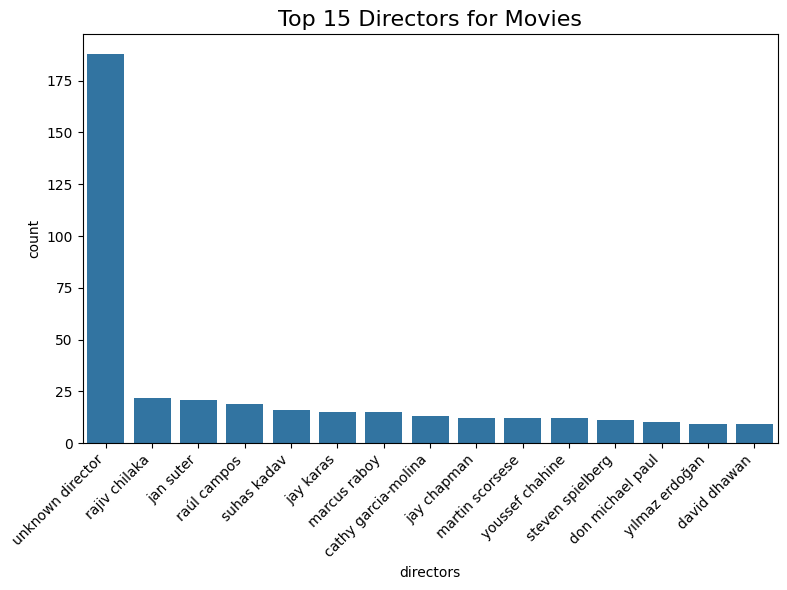

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Top 15 Directors for Movies', fontsize=16)

sns.barplot(data=top10_directors_m.head(15), x='directors', y='count')

plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.tight_layout()
plt.show()


In [ ]:
top10_directors_tv=df_final[df_final['type']=='tv show'].groupby('directors').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
top10_directors_tv

,directors,count
0,unknown director,2445
1,ken burns,3
2,alastair fothergill,3
3,stan lathan,2
4,hsu fu-chun,2
...,...,...
295,hikaru toda,1
296,hernán guerschuny,1
297,he xiaofeng,1
298,hayato date,1


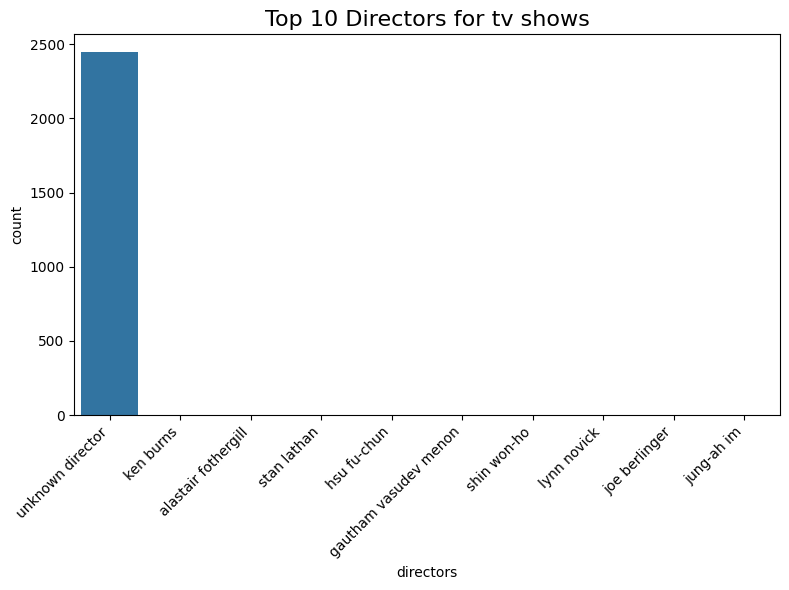

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Top 10 Directors for tv shows', fontsize=16)

sns.barplot(data=top10_directors_tv.head(10), x='directors', y='count')

plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.tight_layout()
plt.show()


#Detailed Analysis:
**Analysing Country-Wise detailed analysis of Movies and tv-show, factoring in: rating,genre,director,cast etc** this can provide us with better recommendations to Netflix

In [ ]:
#below countries will be analyzed for both shows and movies
shows_and_movies=['united states','india','united kingdom']
#below countries will be only analyzed on basis of shows
only_shows=['japan','south korea']

In [ ]:
# Filter once for United States
df_usa = df_final[df_final['country'] == 'united states']

/tmp/ipython-input-870407599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  us_type_counts = df_usa.groupby('type').agg(count=('title','nunique')).reset_index()
/tmp/ipython-input-870407599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=us_type_counts, x='type', y='count', palette='pastel')


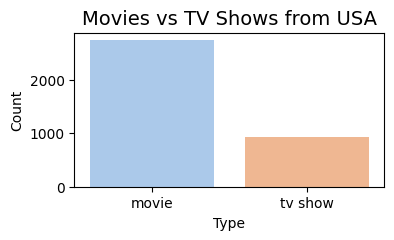

In [ ]:
us_type_counts = df_usa.groupby('type').agg(count=('title','nunique')).reset_index()

plt.figure(figsize=(4,2))
sns.barplot(data=us_type_counts, x='type', y='count', palette='pastel')

plt.title('Movies vs TV Shows from USA', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()


/tmp/ipython-input-446883397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_movie_us.head(10), x='count', y='list_in', palette='pastel')


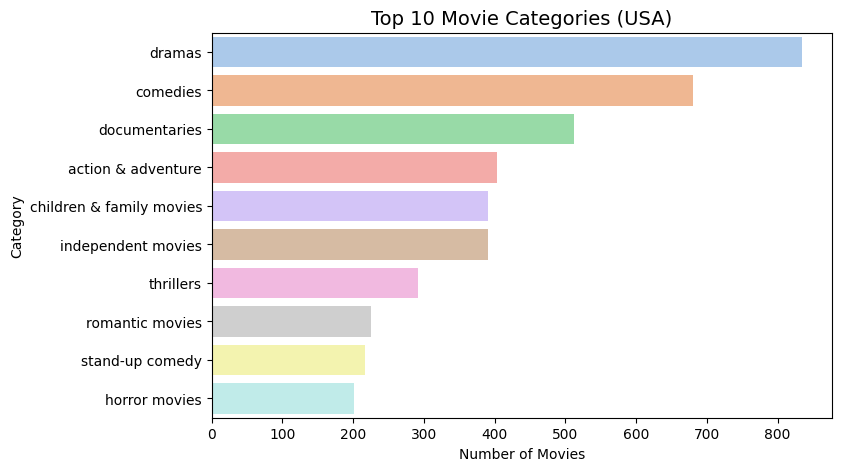

In [ ]:
top_genres_movie_us=df_usa[df_usa['type']=='movie'].groupby('list_in').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top_genres_movie_us.head(10), x='count', y='list_in', palette='pastel')

plt.title('Top 10 Movie Categories (USA)', fontsize=14)
plt.xlabel('Number of Movies')
plt.ylabel('Category')
plt.show()


@Inference

Top 3 genres in US movies are dramas (835), comedies (680), and documentaries (512).

This suggests US cinema is story-driven and entertainment-focused, with strong audience interest in real-life stories (documentaries).

Genres like action & adventure (404) and children & family (390) remain popular, reflecting Hollywood’s global appeal.

Independent movies (390) have a surprisingly high share, showing a thriving indie culture in the US.

Niche categories like stand-up comedy (216) and horror (201), though smaller, highlight diversity in content production.

@ Conclusion

The US movie industry is dominated by dramas and comedies, catering to both emotional and lighthearted storytelling.

A significant portion is devoted to documentaries and indie films, indicating a strong creative and experimental culture.

The mix of blockbuster genres (action, thrillers, romantic) and niche ones (stand-up, horror) shows that US movies balance mass appeal with diversity.

/tmp/ipython-input-499035011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_tv_us.head(10), x='count', y='list_in', palette='pastel')


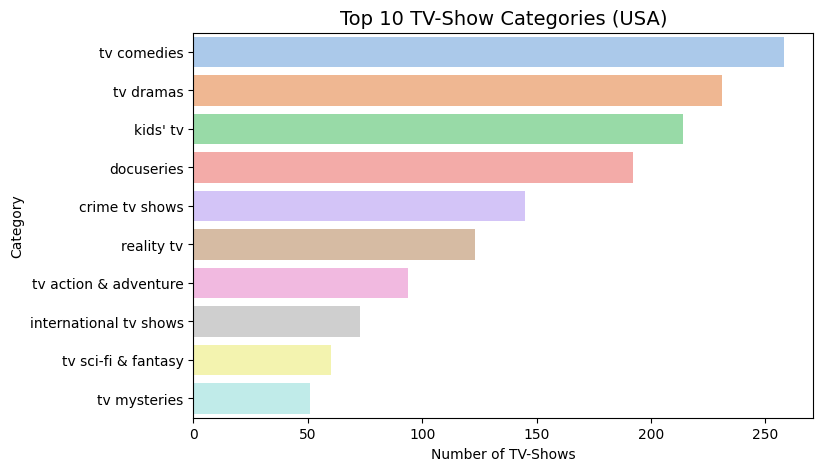

In [ ]:
top_genres_tv_us=df_usa[df_usa['type']=='tv show'].groupby('list_in').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top_genres_tv_us.head(10), x='count', y='list_in', palette='pastel')

plt.title('Top 10 TV-Show Categories (USA)', fontsize=14)
plt.xlabel('Number of TV-Shows')
plt.ylabel('Category')
plt.show()


@Inference

TV comedies (258) and TV dramas (231) dominate, showing US audiences prefer light entertainment and emotional storytelling.

Kids’ TV (214) has a strong share, highlighting the importance of family-oriented content.

Docuseries (192) and crime TV shows (145) reflect growing interest in real-life stories and investigative themes.

Genres like sci-fi & fantasy (60) and mysteries (51) are smaller but serve niche fan bases.

@ Conclusion

US TV content mainly revolves around comedies, dramas, and kids’ shows, balancing family appeal with serious narratives. At the same time, the rise of docuseries and crime shows points to audiences seeking realism and thrill beyond fiction.

/tmp/ipython-input-2939528714.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_us_m=df_usa[df_usa['type']=='movie'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()


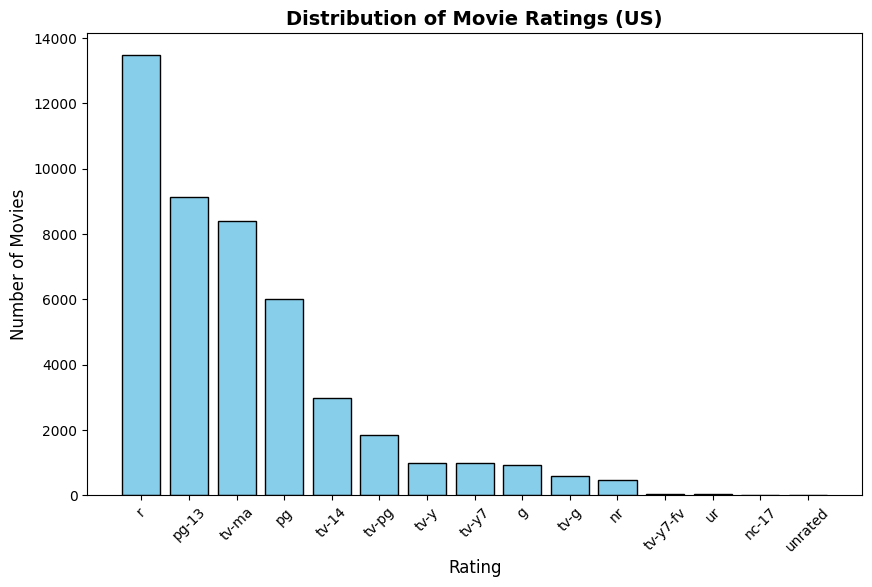

In [ ]:
# Bar plot for US movies rating distribution
rating_us_m=df_usa[df_usa['type']=='movie'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(10,6))
plt.bar(rating_us_m['rating'], rating_us_m['count'], color='skyblue', edgecolor='black')

plt.title("Distribution of Movie Ratings (US)", fontsize=14, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)

# Rotate x labels for readability if needed
plt.xticks(rotation=45)

plt.show()


Most US movies are rated R (13.4k) and PG-13 (9.1k), showing a strong tilt toward teen and adult audiences. Kids/family ratings (PG, TV-PG, G, TV-Y, TV-Y7) are much fewer, while NC-17, UR, and unrated categories are almost negligible.

@**Inference**: The US movie catalog mainly targets mature/teen viewers, with relatively limited content for children and almost none in explicit categories.

In [ ]:
rating_us_tv=df_usa[df_usa['type']=='tv show'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()


/tmp/ipython-input-1433728639.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_us_tv=df_usa[df_usa['type']=='tv show'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()


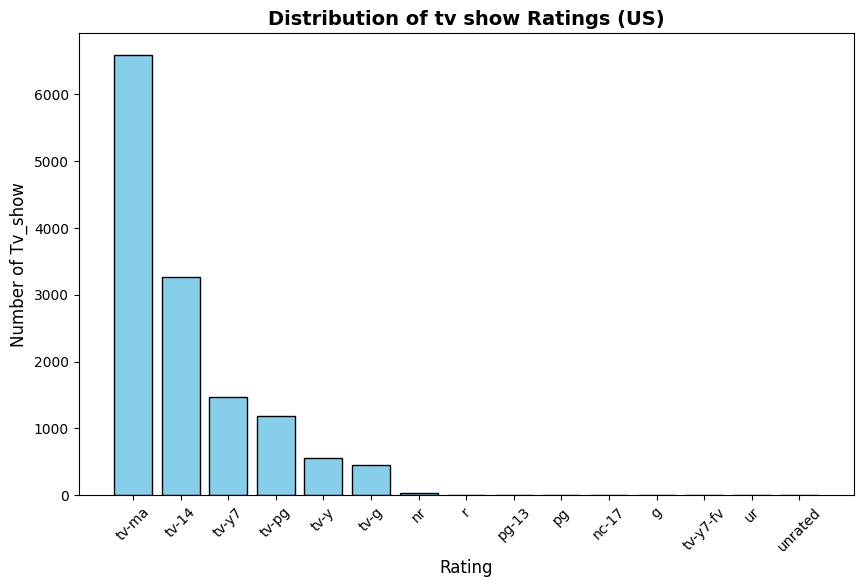

In [ ]:
# Bar plot for US movies rating distribution
plt.figure(figsize=(10,6))
plt.bar(rating_us_tv['rating'], rating_us_tv['count'], color='skyblue', edgecolor='black')

plt.title("Distribution of tv show Ratings (US)", fontsize=14, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Tv_show", fontsize=12)

# Rotate x labels for readability if needed
plt.xticks(rotation=45)

plt.show()


**Conclusion: **TV content in the US is dominated by TV-MA (mature) and TV-14 (teen) ratings, while children-friendly (TV-Y, TV-Y7, TV-G) exist in smaller volumes.

**Inference:** The catalog is heavily adult/teen-oriented, with almost no theatrical movie ratings (R, PG-13, PG, etc.), highlighting a strong focus on streaming TV shows over movies.

US catalog skews heavily toward mature/teen TV (TV-MA & TV-14), with minimal kids’ shows and no theatrical ratings.

**Year-wise content added in US**

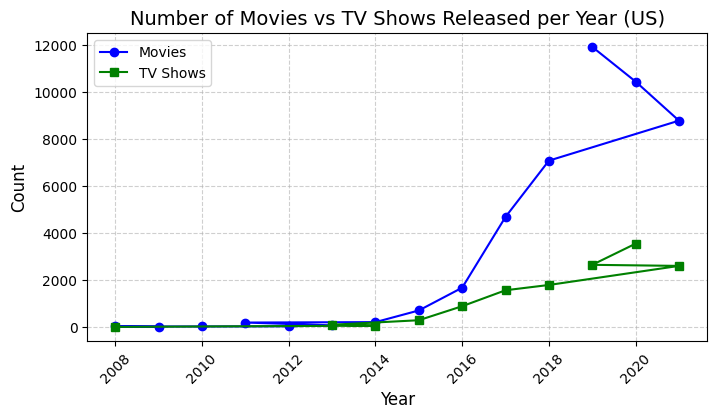

In [ ]:
year_us_m=df_usa[df_usa['type']=='movie'].groupby('Year').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()
year_us_tv=df_usa[df_usa['type']=='tv show'].groupby('Year').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()

plt.figure(figsize=(8,4))

# Plot both
plt.plot(year_us_m['Year'], year_us_m['count'], marker='o', linestyle='-', color='b', label="Movies")
plt.plot(year_us_tv['Year'], year_us_tv['count'], marker='s', linestyle='-', color='g', label="TV Shows")

# Formatting
plt.title("Number of Movies vs TV Shows Released per Year (US)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

From 2015 onward, both movies and TV shows in the USA grew rapidly on streaming platforms, peaking in 2019–2020. Movies saw their highest releases in 2019 (11,922), while TV shows peaked in 2020 (3,545). This surge aligns with the streaming boom and pandemic-driven demand.

 Key Insight: Movies dominated overall, but TV shows also gained strong momentum post-2017, showing a clear shift in audience consumption patterns.

In [ ]:
actors_us_m = df_usa[df_usa['type']=='movie'].groupby('cast').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
actors_us_m.head(5)



,cast,count
0,unknown actor,257
1,samuel l. jackson,21
2,adam sandler,20
3,james franco,19
4,nicolas cage,18


In [ ]:
actors_us_tv = df_usa[df_usa['type']=='tv show'].groupby('cast').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
actors_us_tv.head(5)


,cast,count
0,unknown actor,150
1,grey griffin,10
2,vincent tong,8
3,tara strong,7
4,steven yeun,7


For **India:**

In [ ]:
df_india = df_final[df_final['country'] == 'india']


/tmp/ipython-input-180725788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  india_type_counts = df_usa.groupby('type').agg(count=('title','nunique')).reset_index()
/tmp/ipython-input-180725788.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=india_type_counts, x='type', y='count', palette='pastel')


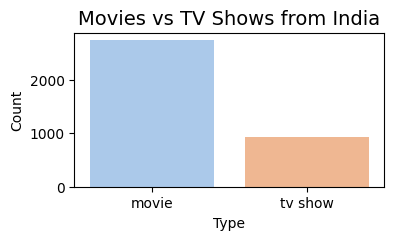

In [ ]:
india_type_counts = df_usa.groupby('type').agg(count=('title','nunique')).reset_index()

plt.figure(figsize=(4,2))
sns.barplot(data=india_type_counts, x='type', y='count', palette='pastel')

plt.title('Movies vs TV Shows from India', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()


/tmp/ipython-input-1813746443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_movie_india.head(10), x='count', y='list_in', palette='pastel')


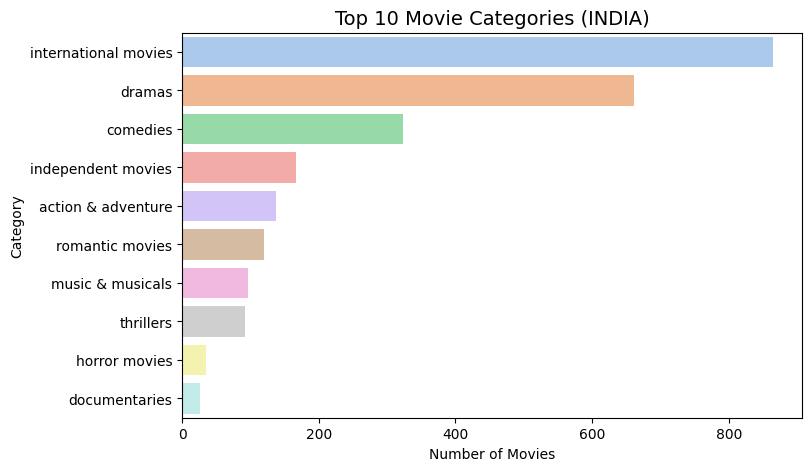

In [ ]:
top_genres_movie_india=df_india[df_india['type']=='movie'].groupby('list_in').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top_genres_movie_india.head(10), x='count', y='list_in', palette='pastel')

plt.title('Top 10 Movie Categories (INDIA)', fontsize=14)
plt.xlabel('Number of Movies')
plt.ylabel('Category')
plt.show()


International movies (864) and mainstream genres like dramas (662) and comedies (323) dominate the catalog, highlighting a focus on widely relatable content. Independent films (167) and action/adventure (137) add diversity, while niche genres like LGBTQ (2), faith & spirituality (4), and cult films (5) are minimally represented. This shows the platform prioritizes broad global appeal and storytelling depth (dramas, comedies, international films), while giving limited space to experimental or niche categories.

/tmp/ipython-input-1716630201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_tv_india.head(10), x='count', y='list_in', palette='pastel')


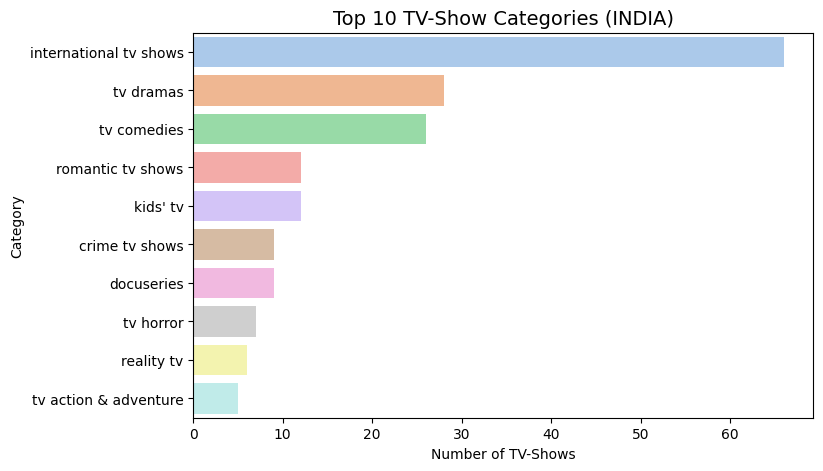

In [ ]:
top_genres_tv_india=df_india[df_india['type']=='tv show'].groupby('list_in').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top_genres_tv_india.head(10), x='count', y='list_in', palette='pastel')

plt.title('Top 10 TV-Show Categories (INDIA)', fontsize=14)
plt.xlabel('Number of TV-Shows')
plt.ylabel('Category')
plt.show()


International TV shows dominate the catalog (66), far ahead of other categories. Drama (28) and comedy (26) are the next strongest genres, showing clear global and mainstream appeal. Niche genres like teen, sci-fi, thrillers, and mysteries have minimal representation, suggesting the platform prioritizes broad-audience content over specialized categories.

/tmp/ipython-input-2498805746.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_india_m=df_india[df_india['type']=='movie'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()


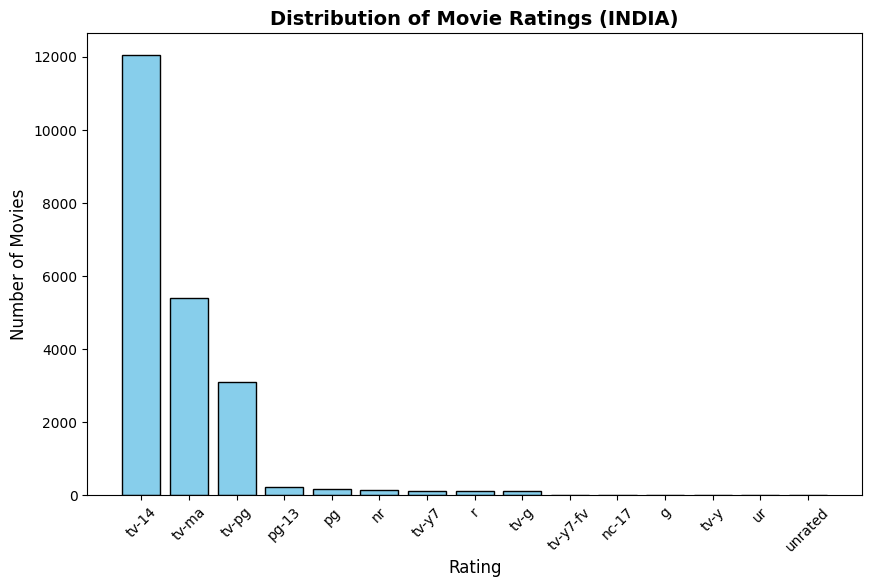

In [ ]:
# Bar plot for US movies rating distribution
rating_india_m=df_india[df_india['type']=='movie'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(10,6))
plt.bar(rating_india_m['rating'], rating_india_m['count'], color='skyblue', edgecolor='black')

plt.title("Distribution of Movie Ratings (INDIA)", fontsize=14, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)

# Rotate x labels for readability if needed
plt.xticks(rotation=45)

plt.show()


Most movies fall under TV-14 and TV-MA, showing the platform’s strong tilt toward teen and mature audiences, while family/kids-friendly ratings are minimal, indicating less emphasis on children’s content.

/tmp/ipython-input-3252839381.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_india_tv=df_india[df_india['type']=='tv show'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()


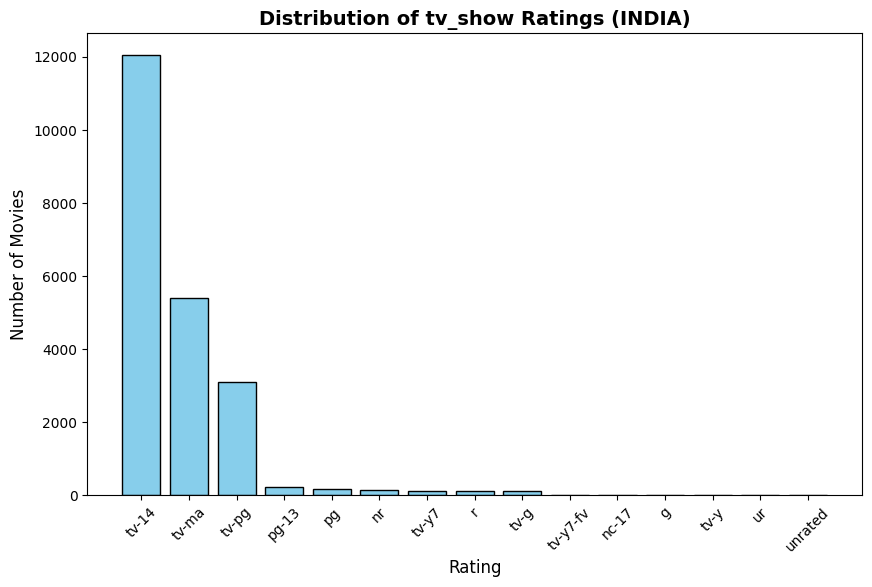

In [ ]:
# Bar plot for US movies rating distribution
rating_india_tv=df_india[df_india['type']=='tv show'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(10,6))
plt.bar(rating_india_m['rating'], rating_india_m['count'], color='skyblue', edgecolor='black')

plt.title("Distribution of tv_show Ratings (INDIA)", fontsize=14, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)

# Rotate x labels for readability if needed
plt.xticks(rotation=45)

plt.show()


TV shows are heavily skewed toward mature audiences (TV-MA, TV-14), with only a small share for kids/family content.

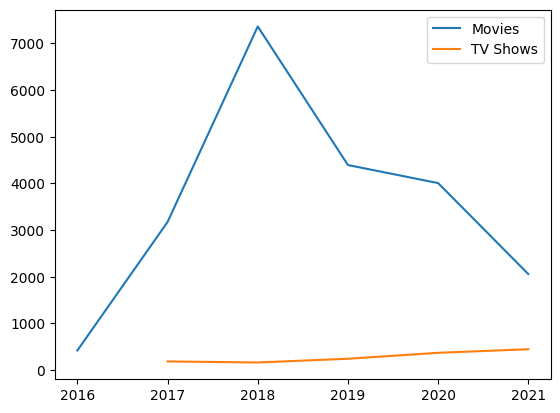

In [ ]:
year_india_m = df_india[df_india['type']=='movie'].groupby('Year')['title'].count().reset_index()
year_india_tv = df_india[df_india['type']=='tv show'].groupby('Year')['title'].count().reset_index()

plt.plot(year_india_m['Year'], year_india_m['title'], label="Movies")
plt.plot(year_india_tv['Year'], year_india_tv['title'], label="TV Shows")
plt.legend()
plt.show()


Movies: Sharp rise till 2018 (peak at 7362), then a decline year by year.

TV Shows: Steady, consistent growth from 2017 (184) to 2021 (446).

**Inference**: Netflix’s Indian content strategy shifted — early years were movie-heavy, but after 2018 the focus moved towards expanding TV shows.

In [ ]:
actors_india = df_india[df_india['type']=='movie'].groupby('cast').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
actors_india.head(10)



,cast,count
0,anupam kher,40
1,shah rukh khan,34
2,naseeruddin shah,31
3,om puri,29
4,akshay kumar,29
5,paresh rawal,28
6,amitabh bachchan,28
7,boman irani,27
8,kareena kapoor,25
9,ajay devgn,21


In [ ]:
actors_india_tv = df_india[df_india['type']=='tv show'].groupby('cast').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
actors_india_tv.head(10)



,cast,count
0,unknown actor,19
1,rajesh kava,3
2,nishka raheja,3
3,mona ambegaonkar,2
4,anjali,2
5,radhika apte,2
6,aranya kaur,2
7,manish chaudhary,2
8,rajesh tailang,2
9,rasika dugal,2


**United Kingdom-**

In [ ]:
df_uk = df_final[df_final['country'] == 'united kingdom']


/tmp/ipython-input-1429703078.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  uk_type_counts = df_uk.groupby('type').agg(count=('title','nunique')).reset_index()
/tmp/ipython-input-1429703078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uk_type_counts, x='type', y='count', palette='pastel')


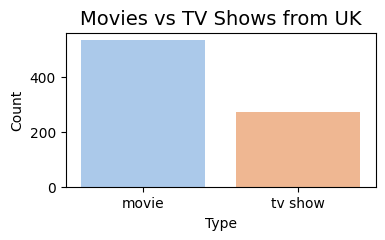

In [ ]:
uk_type_counts = df_uk.groupby('type').agg(count=('title','nunique')).reset_index()

plt.figure(figsize=(4,2))
sns.barplot(data=uk_type_counts, x='type', y='count', palette='pastel')

plt.title('Movies vs TV Shows from UK', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()


/tmp/ipython-input-1941603263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_movie_uk.head(10), x='count', y='list_in', palette='pastel')


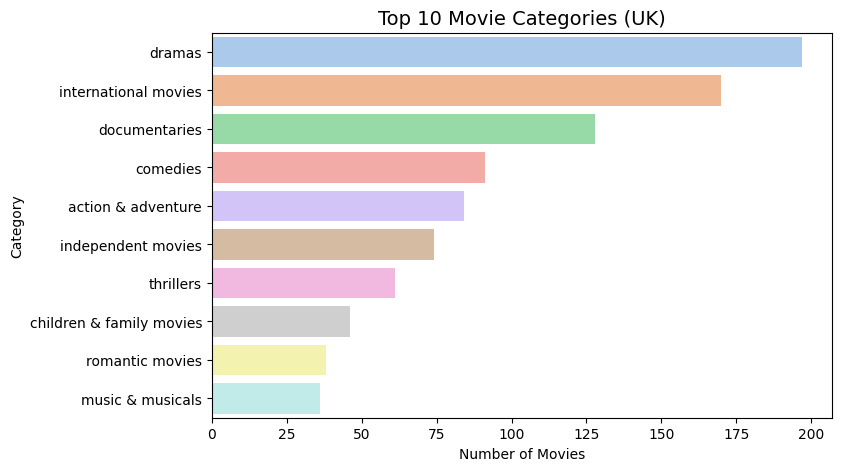

In [ ]:
top_genres_movie_uk=df_uk[df_uk['type']=='movie'].groupby('list_in').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top_genres_movie_uk.head(10), x='count', y='list_in', palette='pastel')

plt.title('Top 10 Movie Categories (UK)', fontsize=14)
plt.xlabel('Number of Movies')
plt.ylabel('Category')
plt.show()


**Conclusion**: UK Netflix library (movie) is dominated by dramas, international movies, and documentaries, with fewer romantic or musical titles.

**Inference**: Viewers in the UK seem to prefer serious, diverse, and globally-oriented content over light genres like romance or musicals.

/tmp/ipython-input-3919897204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_tv_uk.head(10), x='count', y='list_in', palette='pastel')


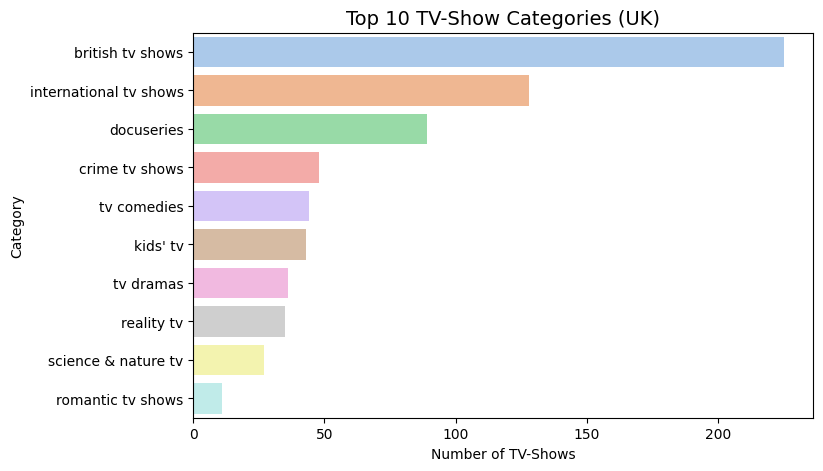

In [ ]:
top_genres_tv_uk=df_uk[df_uk['type']=='tv show'].groupby('list_in').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top_genres_tv_uk.head(10), x='count', y='list_in', palette='pastel')

plt.title('Top 10 TV-Show Categories (UK)', fontsize=14)
plt.xlabel('Number of TV-Shows')
plt.ylabel('Category')
plt.show()


**Conclusion**: UK TV content is led by British TV shows, international TV shows, and docuseries, while romantic TV shows are least represented.

**Inference**: UK audiences lean toward local productions, global variety, and informative content rather than romance-driven TV.

/tmp/ipython-input-2360796034.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_uk_m=df_uk[df_uk['type']=='movie'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()


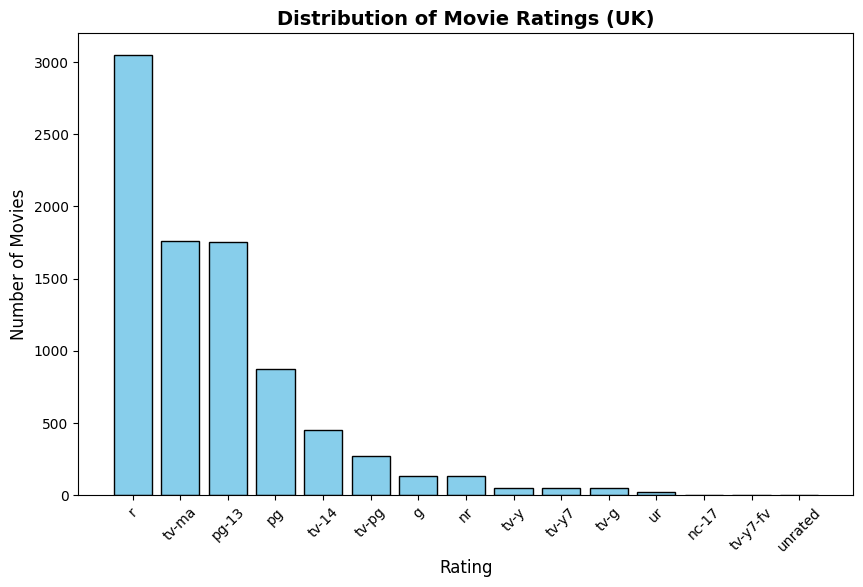

In [ ]:
# Bar plot for US movies rating distribution
rating_uk_m=df_uk[df_uk['type']=='movie'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(10,6))
plt.bar(rating_uk_m['rating'], rating_uk_m['count'], color='skyblue', edgecolor='black')

plt.title("Distribution of Movie Ratings (UK)", fontsize=14, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)

# Rotate x labels for readability if needed
plt.xticks(rotation=45)

plt.show()


r, tv-ma,pg-13 are dominating in British movies.

/tmp/ipython-input-860690270.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_uk_tv=df_uk[df_uk['type']=='tv show'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()


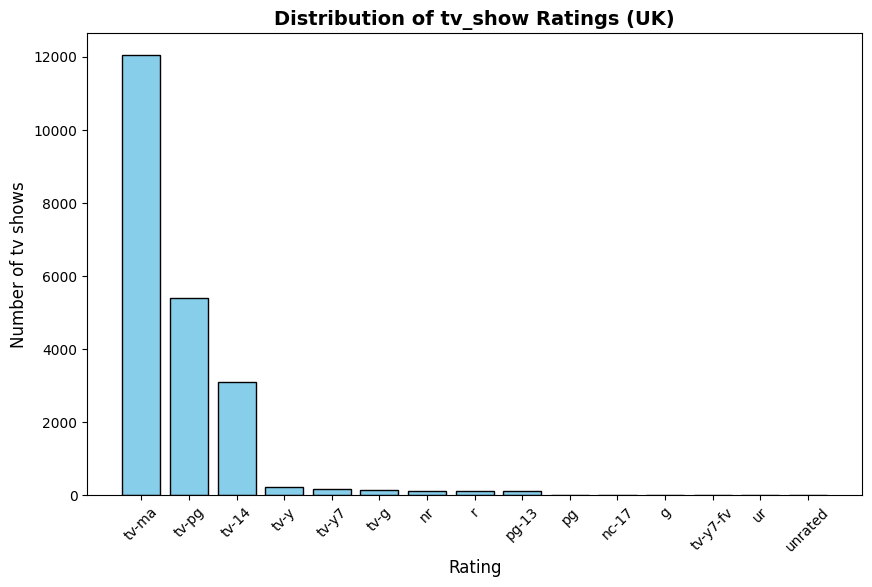

In [ ]:
# Bar plot for US movies rating distribution
rating_uk_tv=df_uk[df_uk['type']=='tv show'].groupby('rating').agg(count=('title','count')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(10,6))
plt.bar(rating_uk_tv['rating'], rating_india_m['count'], color='skyblue', edgecolor='black')

plt.title("Distribution of tv_show Ratings (UK)", fontsize=14, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of tv shows", fontsize=12)

# Rotate x labels for readability if needed
plt.xticks(rotation=45)

plt.show()


British tv shows are dominated by tv-ma,tv-pg,tv-14 in ratings.

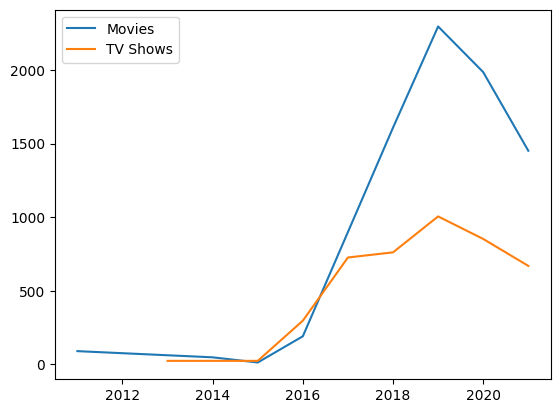

In [ ]:
year_uk_m = df_uk[df_uk['type']=='movie'].groupby('Year')['title'].count().reset_index()
year_uk_tv = df_uk[df_uk['type']=='tv show'].groupby('Year')['title'].count().reset_index()

plt.plot(year_uk_m['Year'], year_uk_m['title'], label="Movies")
plt.plot(year_uk_tv['Year'], year_uk_tv['title'], label="TV Shows")
plt.legend()
plt.show()


**Conclusion**:

UK movies saw a sharp rise after 2016, peaking in 2019 (2295), then declining post-2020.

UK TV shows also grew strongly, peaking in 2019 (1005), but similarly declined after 2020.

**Inference**:
Both movies and TV shows in the UK experienced a boom around 2017–2019, likely due to streaming platforms’ expansion, followed by a drop during/after COVID-19, reflecting production slowdowns and shifting industry priorities.

In [ ]:
actors_uk_m = df_uk[df_uk['type']=='movie'].groupby('cast').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
actors_uk_m.head(5)



,cast,count
0,unknown actor,58
1,john cleese,11
2,judi dench,9
3,michael palin,9
4,brendan gleeson,8


In [ ]:
actors_uk_tv = df_uk[df_uk['type']=='tv show'].groupby('cast').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
actors_uk_tv.head(5)



,cast,count
0,unknown actor,39
1,david attenborough,13
2,michael palin,5
3,terry jones,5
4,john cleese,5


**Since Japan and South Korea have more tv shows compared to movies, we can analyse their tv shows for better recommendations**

In [ ]:
japan_tv=df_final[df_final['country']=='japan']



/tmp/ipython-input-3095286827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_tv_japan.head(10), x='count', y='list_in', palette='pastel')


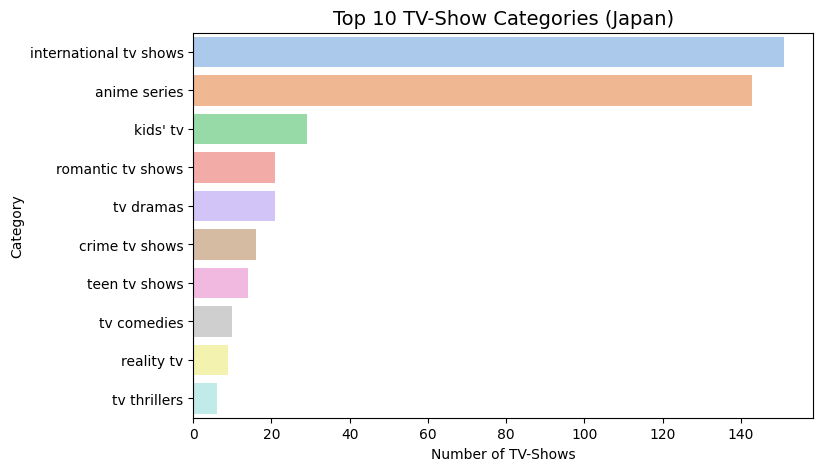

In [ ]:
top_genres_tv_japan=japan_tv[japan_tv['type']=='tv show'].groupby('list_in').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top_genres_tv_japan.head(10), x='count', y='list_in', palette='pastel')

plt.title('Top 10 TV-Show Categories (Japan)', fontsize=14)
plt.xlabel('Number of TV-Shows')
plt.ylabel('Category')
plt.show()


In [ ]:
sk_tv=df_final[df_final['country']=='south korea']



/tmp/ipython-input-3647175651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_tv_sk.head(10), x='count', y='list_in', palette='pastel')


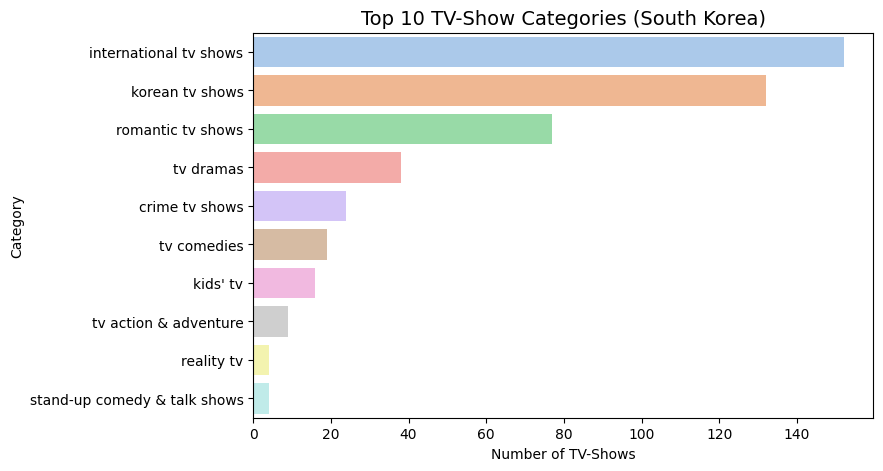

In [ ]:
top_genres_tv_sk=sk_tv[sk_tv['type']=='tv show'].groupby('list_in').agg(count=('title','nunique')).sort_values('count',ascending=False).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top_genres_tv_sk.head(10), x='count', y='list_in', palette='pastel')

plt.title('Top 10 TV-Show Categories (South Korea)', fontsize=14)
plt.xlabel('Number of TV-Shows')
plt.ylabel('Category')
plt.show()


South Korea

Dominance: International TV shows (152) and Korean TV shows (132) dominate — showing Korea’s strong global exportability of content (K-dramas, K-pop-driven shows).

Genres: Heavy tilt toward romance (77) and dramas (38), aligning with the popularity of K-dramas worldwide.

Low variety: Very few in thrillers, horror, or comedy → Korea focuses more on emotional storytelling than genre diversity.

Japan

Dominance: International TV shows (151) + Anime series (143) stand out → highlighting Japan’s global leadership in anime as cultural soft power.

Genres: Broader spread (romance, crime, teen shows, comedies, thrillers) compared to Korea → suggests greater diversity in content.

Kids’ content (29) is relatively strong, reflecting Japan’s global children-focused anime/manga culture.

Inference

Korea = Drama & romance powerhouse, highly emotional, globalized.

Japan = Anime leader with broader genre variety, balancing global appeal with niche audiences.

👉 Together, they represent two different cultural export models: Korea with live-action drama/romance, Japan with anime + wider spread.

**1. Content Strategy**

**India →** Heavily driven by dramas, comedies, and international films.

*  Recommendation: Double down on local-language originals (Hindi + regional like Tamil, Telugu, Bengali) since Indian audiences value culturally rooted storytelling. Expand stand-up comedy specials (growing demand).UK → Strong preference for British shows + docuseries.
* Recommendation: Invest in premium docuseries (true crime, history, investigative) and prestige British dramas. Partner with BBC/ITV talent to capture loyal audiences.
South Korea → Dominated by romance + dramas (K-dramas).


* Recommendation: Keep funding romance/drama series with global appeal, but experiment with K-thrillers and K-sci-fi to diversify exports (avoid saturation).

Japan → Anime powerhouse with diverse genres.
* Recommendation: Make Netflix the “global home of anime” by licensing classic hits and co-producing exclusive new titles. Expand kids’ anime lineup to capture families.

**2. Audience Growth & Retention**

* Localized Pricing Models: Countries like India are price-sensitive → offer mobile-only plans or bundles with telecom providers.
* Regional Personalization: Refine recommendation algorithms to prioritize local hits in top 10 lists instead of global-only trends.


*  Community Building: Encourage fandom-driven experiences (K-drama fan clubs, anime forums, watch parties) to build loyalty.

**3. Product & Platform Innovations**
*  Interactive Content: Build on Bandersnatch → give viewers choice-driven K-dramas, anime adventures, or docu-mysteries. This increases engagement time.


*  Short-Form Tie-ins: Experiment with 15-min quick episodes for mobile audiences in India, SEA, Africa. Compete with YouTube/TikTok for attention.

*  AI-driven Localization: Auto-generate subtitles & dubbing in multiple languages using AI to make every show globally accessible faster.

**4. Partnerships & Ecosystem Expansion**


* Telco Bundling: Bundle Netflix with Jio, Airtel, SoftBank, SK Telecom → capture mobile-first markets.

* Merchandising & Licensing: Anime (Japan) + K-dramas (Korea) have high merch demand → Netflix can co-own IPs and sell merchandise globally.

* Cultural Events: Sponsor K-drama fan events, anime conventions, docufilm screenings in UK universities. Builds cultural presence beyond the screen.


**5. Competitive Edge vs Rivals**

*  
Disney+ → dominates family/kids → Netflix should go all-in on anime & young-adult fantasy (Harry Potter-type gaps).


*  Amazon Prime → bundles with shopping → Netflix must bundle with lifestyle (fitness content, food shows, or Spotify/music collabs).

*  Local OTTs (Hotstar, TVING, Abema, iQIYI) → Netflix should secure exclusivity contracts with rising stars and studios before rivals do.

** Big Picture Insight:**
Netflix should not compete everywhere the same way. Instead →

India = Price + Local Originals

UK = Docuseries + Prestige Drama

Korea = K-dramas + Experimental Thrillers

Japan = Anime + Kids

Global = Interactive + AI-driven dubbing

That way Netflix becomes “global but locally unbeatable.”